In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [28]:
df=pd.read_csv('Data file.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#dtypes: float64(3), int64(35), object(43)
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.describe(include=[object])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [8]:
df.describe(include = 'all').T

count unique     top  freq     mean      std    min     25%  \
Id             1460    NaN     NaN   NaN    730.5   421.61      1  365.75   
MSSubClass     1460    NaN     NaN   NaN  56.8973  42.3006     20      20   
MSZoning       1460      5      RL  1151      NaN      NaN    NaN     NaN   
LotFrontage    1201    NaN     NaN   NaN    70.05  24.2848     21      59   
LotArea        1460    NaN     NaN   NaN  10516.8  9981.26   1300  7553.5   
...             ...    ...     ...   ...      ...      ...    ...     ...   
MoSold         1460    NaN     NaN   NaN  6.32192  2.70363      1       5   
YrSold         1460    NaN     NaN   NaN  2007.82   1.3281   2006    2007   
SaleType       1460      9      WD  1267      NaN      NaN    NaN     NaN   
SaleCondition  1460      6  Normal  1198      NaN      NaN    NaN     NaN   
SalePrice      1460    NaN     NaN   NaN   180921  79442.5  34900  129975   

                  50%      75%     max  
Id              730.5  1095.25    1460  
MSSubClass         50       70     190  
MSZoning          NaN      NaN     NaN  
LotFrontage        69       80     313  
LotArea        9478.5  11601.5  215245  
...               ...      ...     ...  
MoSold              6        8      12  
YrSold           2008     2009    2010  
SaleType          NaN      NaN     NaN  
SaleCondition     NaN      NaN     NaN  
SalePrice      163000   214000  755000  

[81 rows x 11 columns]

In [9]:
#Lets check the object type columns
#their value counts and uniques values

for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

# df.isnull().sum()

In [10]:
# Number of of null values in each column
count=round(df.isnull().sum(),2)
percent=round((df.isnull().sum()/df.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
data[data['Missing Values Count']!=0]

index  Missing Values Count  Missing Values %
3    LotFrontage                   259             17.74
6          Alley                  1369             93.77
25    MasVnrType                     8              0.55
26    MasVnrArea                     8              0.55
30      BsmtQual                    37              2.53
31      BsmtCond                    37              2.53
32  BsmtExposure                    38              2.60
33  BsmtFinType1                    37              2.53
35  BsmtFinType2                    38              2.60
42    Electrical                     1              0.07
57   FireplaceQu                   690             47.26
58    GarageType                    81              5.55
59   GarageYrBlt                    81              5.55
60  GarageFinish                    81              5.55
63    GarageQual                    81              5.55
64    GarageCond                    81              5.55
72        PoolQC                  1453             99.52
73         Fence                  1179             80.75
74   MiscFeature                  1406             96.30

In [11]:
#Alley,PoolQC,Fence,MiscFeature  features has more than 80% null values lets drop those columns

In [12]:
#check for duplicated data
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [25]:
df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

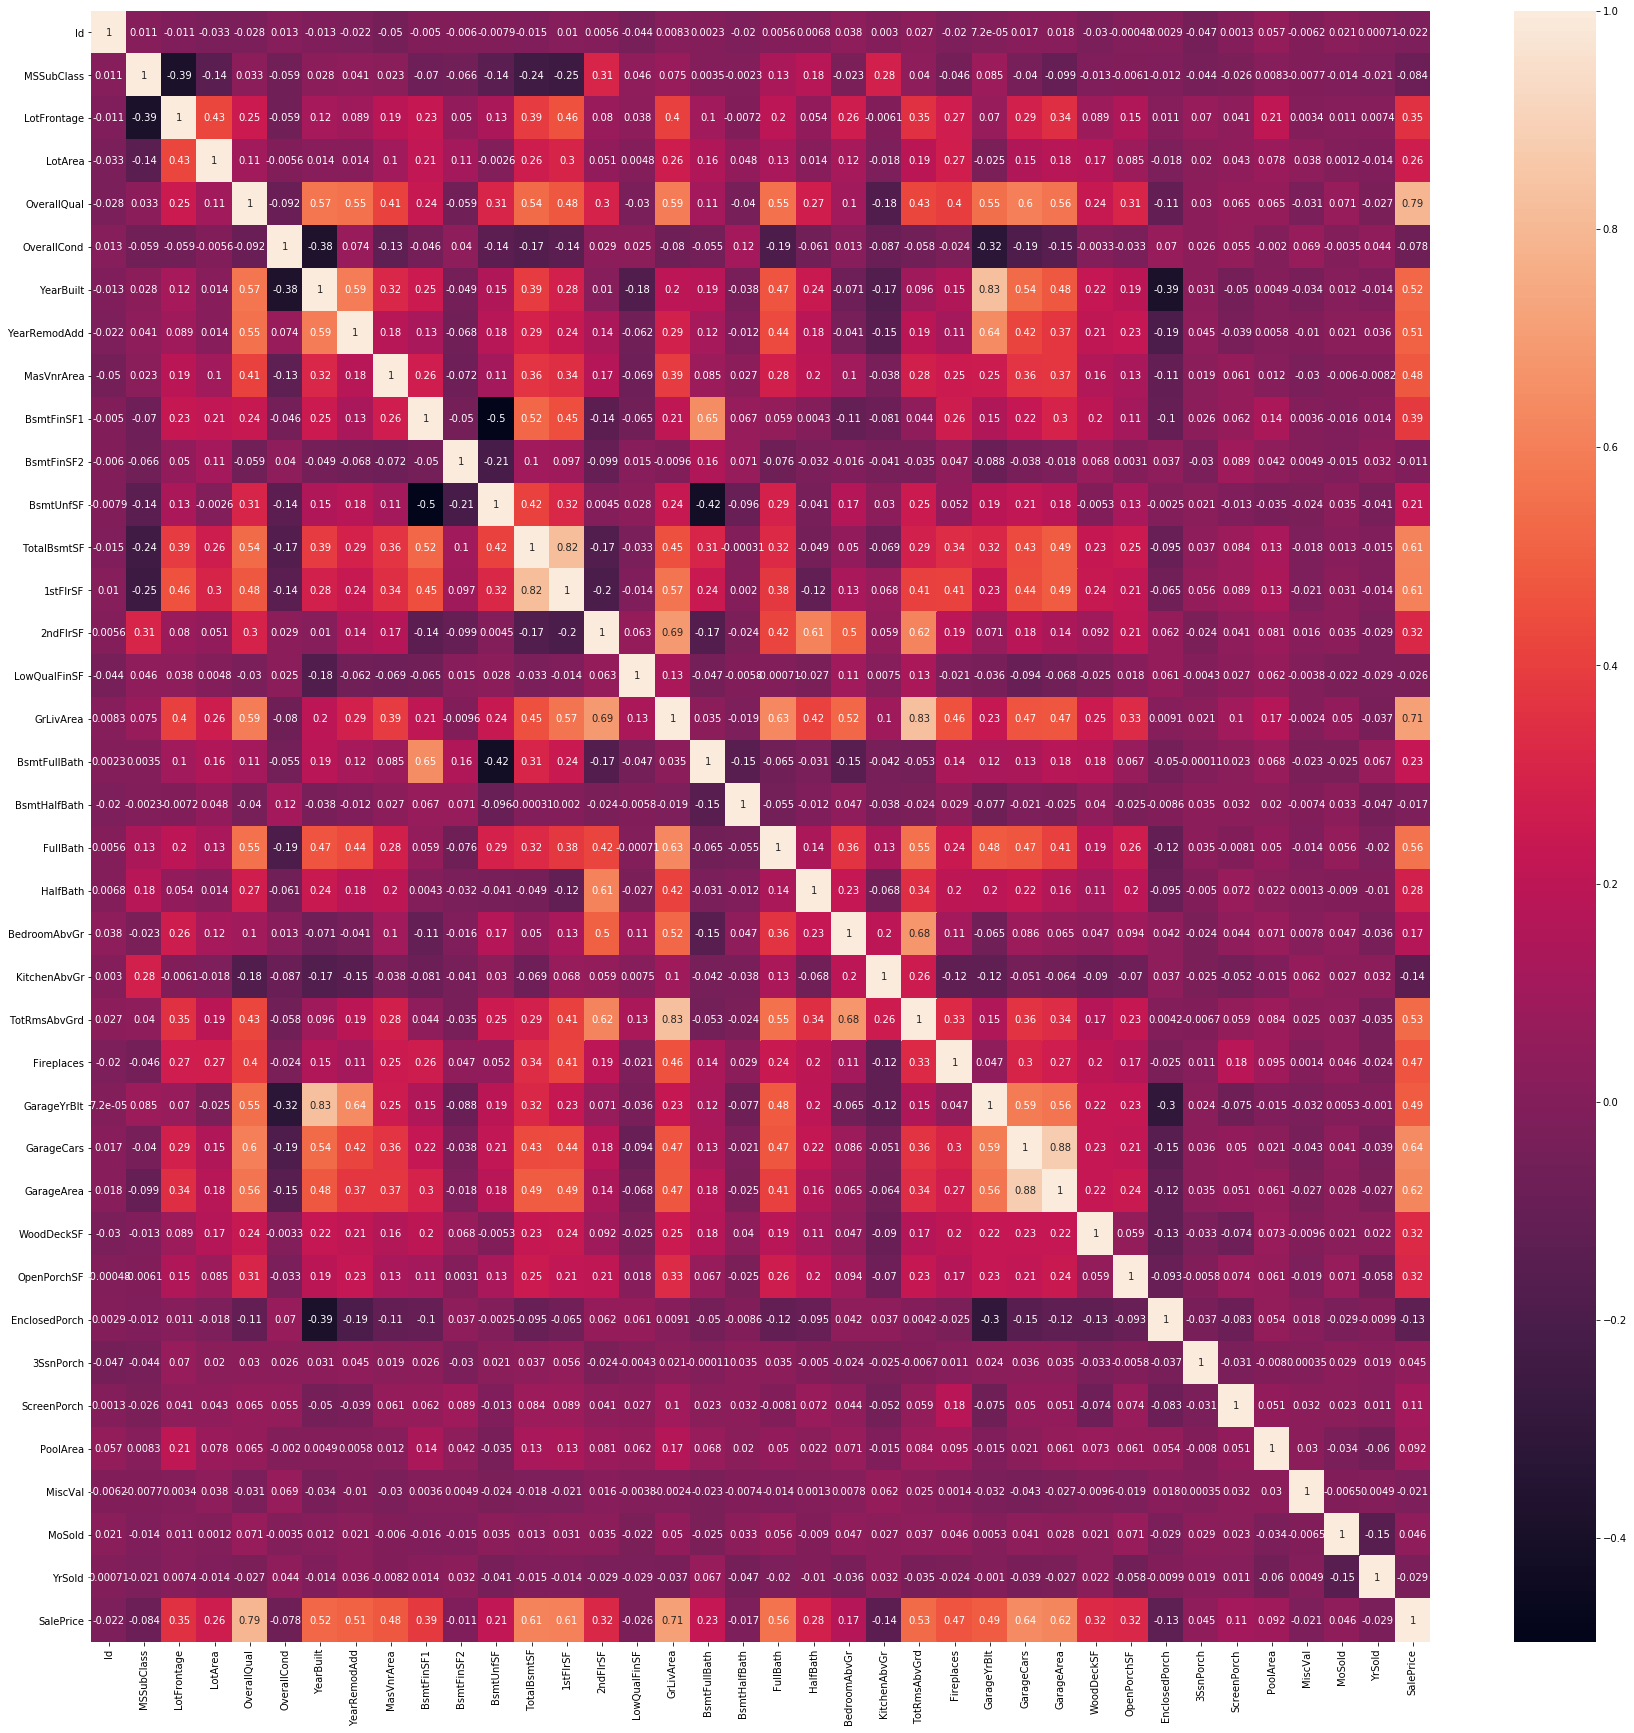

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

No handles with labels found to put in legend.


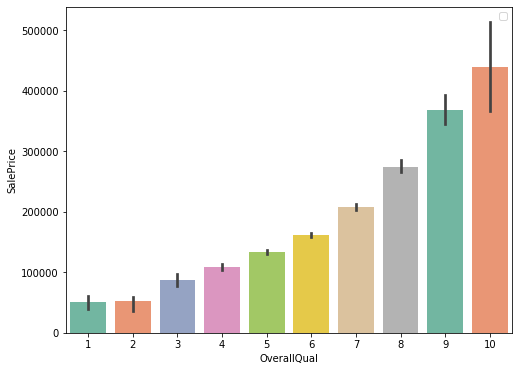

In [35]:
figure = plt.figure(figsize=(8,6))
sns.barplot(x ='OverallQual',y ='SalePrice',data=df,palette = 'Set2')
plt.legend(loc = 0)

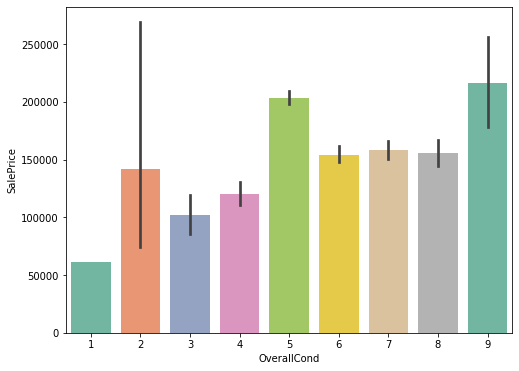

In [36]:
figure = plt.figure(figsize=(8,6))
sns.barplot(x ='OverallCond',y ='SalePrice',data=df,palette = 'Set2')

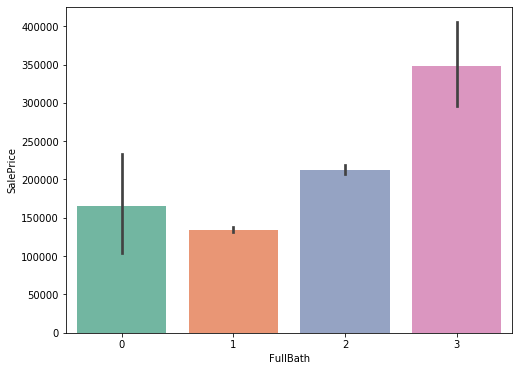

In [37]:
figure = plt.figure(figsize=(8,6))
sns.barplot(x ='FullBath',y ='SalePrice',data=df,palette = 'Set2')

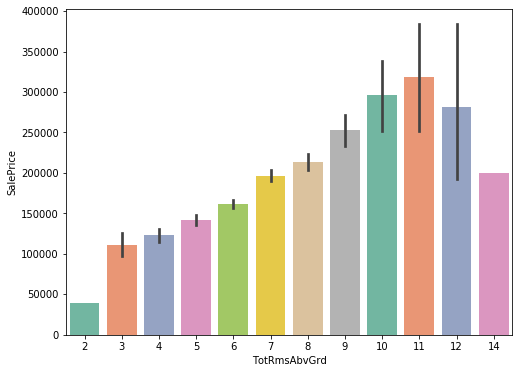

In [38]:
figure = plt.figure(figsize=(8,6))
sns.barplot(x ='TotRmsAbvGrd',y ='SalePrice',data=df,palette = 'Set2')

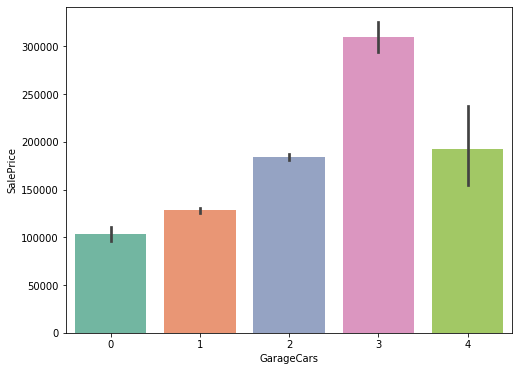

In [39]:
figure = plt.figure(figsize=(8,6))
sns.barplot(x ='GarageCars',y ='SalePrice',data=df,palette = 'Set2')

### Separating Numerical , Categorical and Yearly columns

In [123]:
#separating Numerical and categorical variables
NumericData=df.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 70
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'M

In [15]:
#separating Numerical and categorical variables
CategoricData=df.select_dtypes(include=['object','category'])
rows,col=(CategoricData.shape)
print("Number of Categorical columns are:",col)
print(CategoricData.columns)

Number of Categorical columns are: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [16]:
#Univariate Analysis Plots for categorical data
CategoricData.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

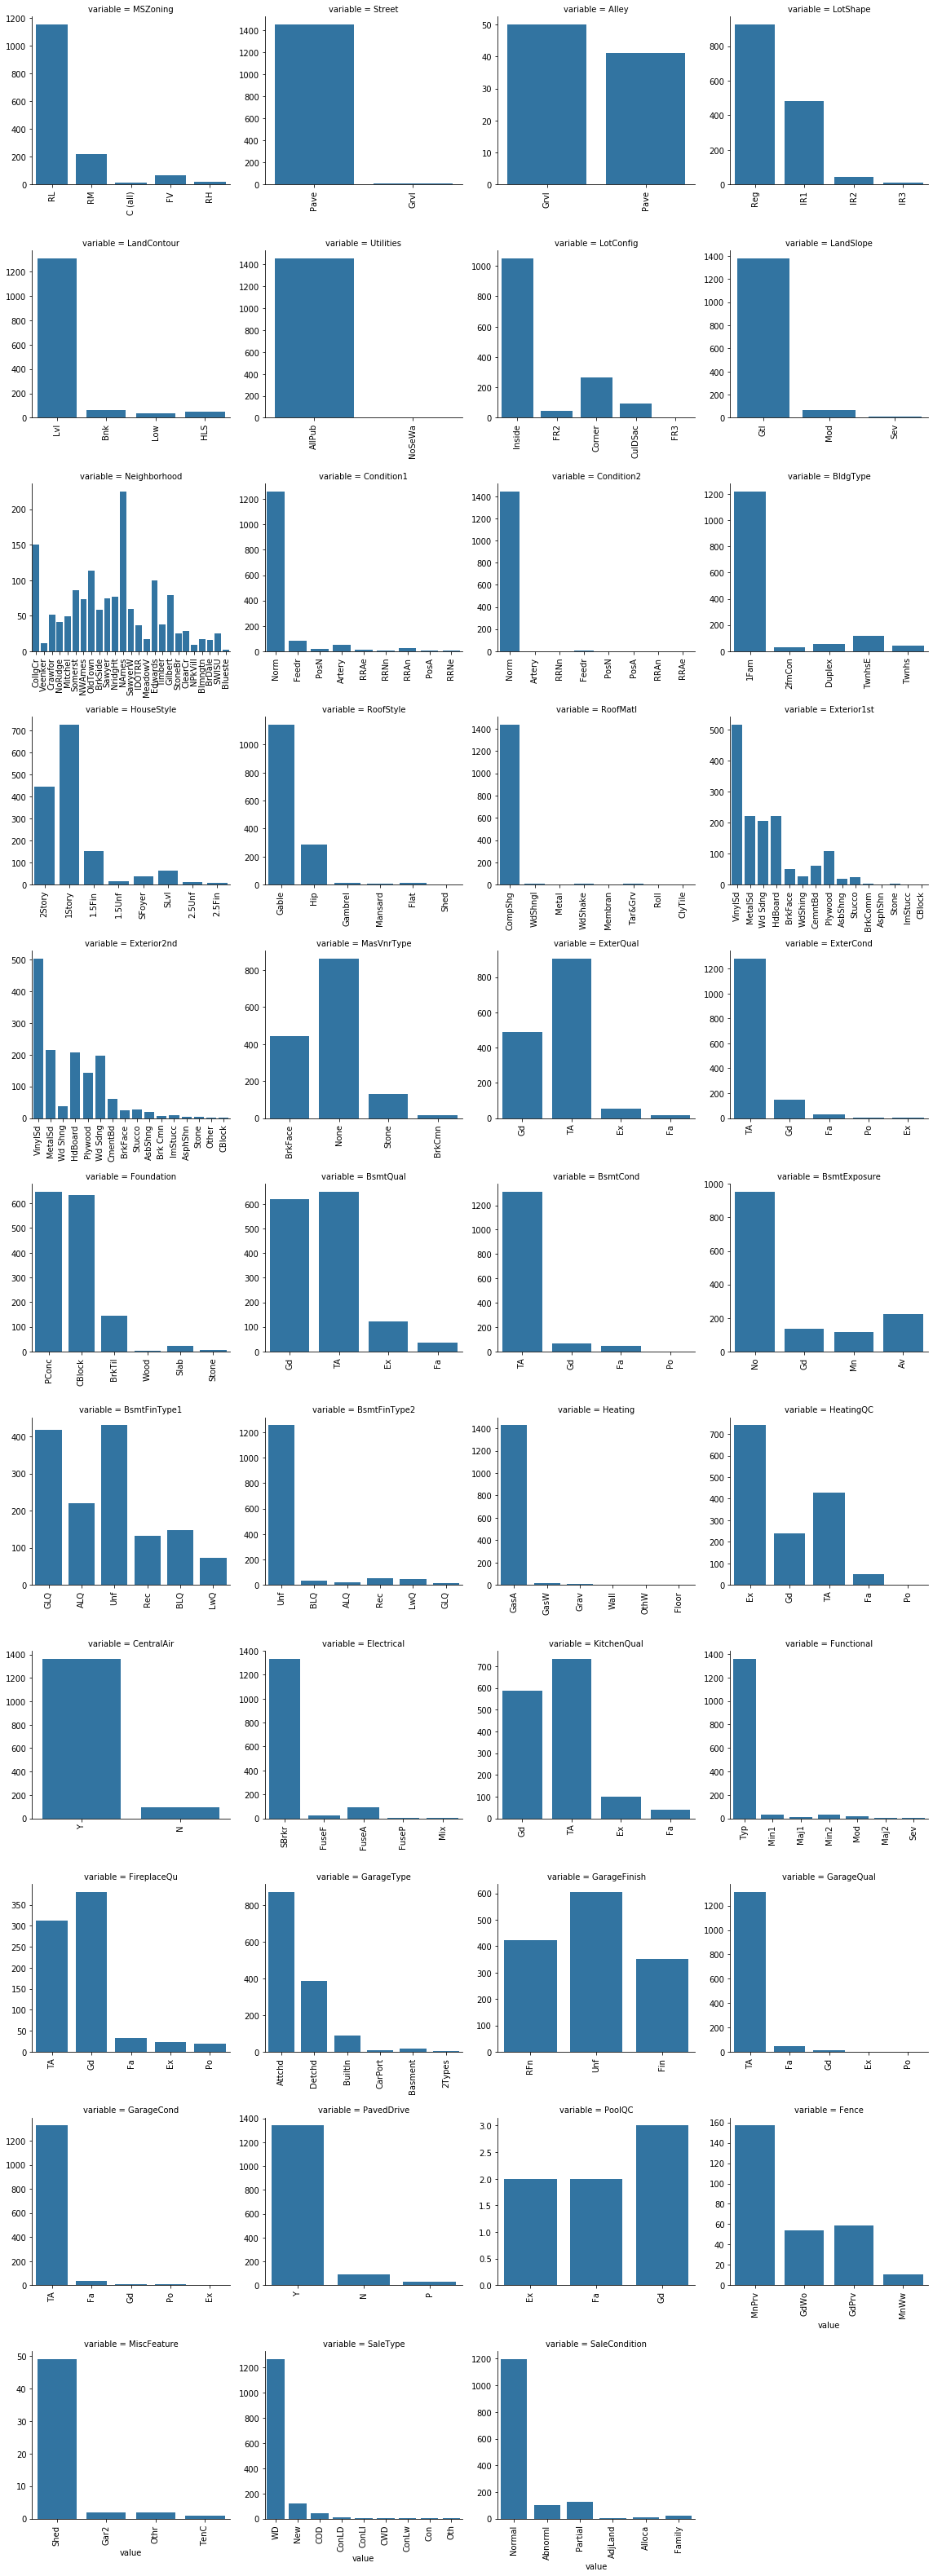

In [17]:
#melting the dataframe to bring the data into single column
ConvertedCatDataMelt=CategoricData.melt()

#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

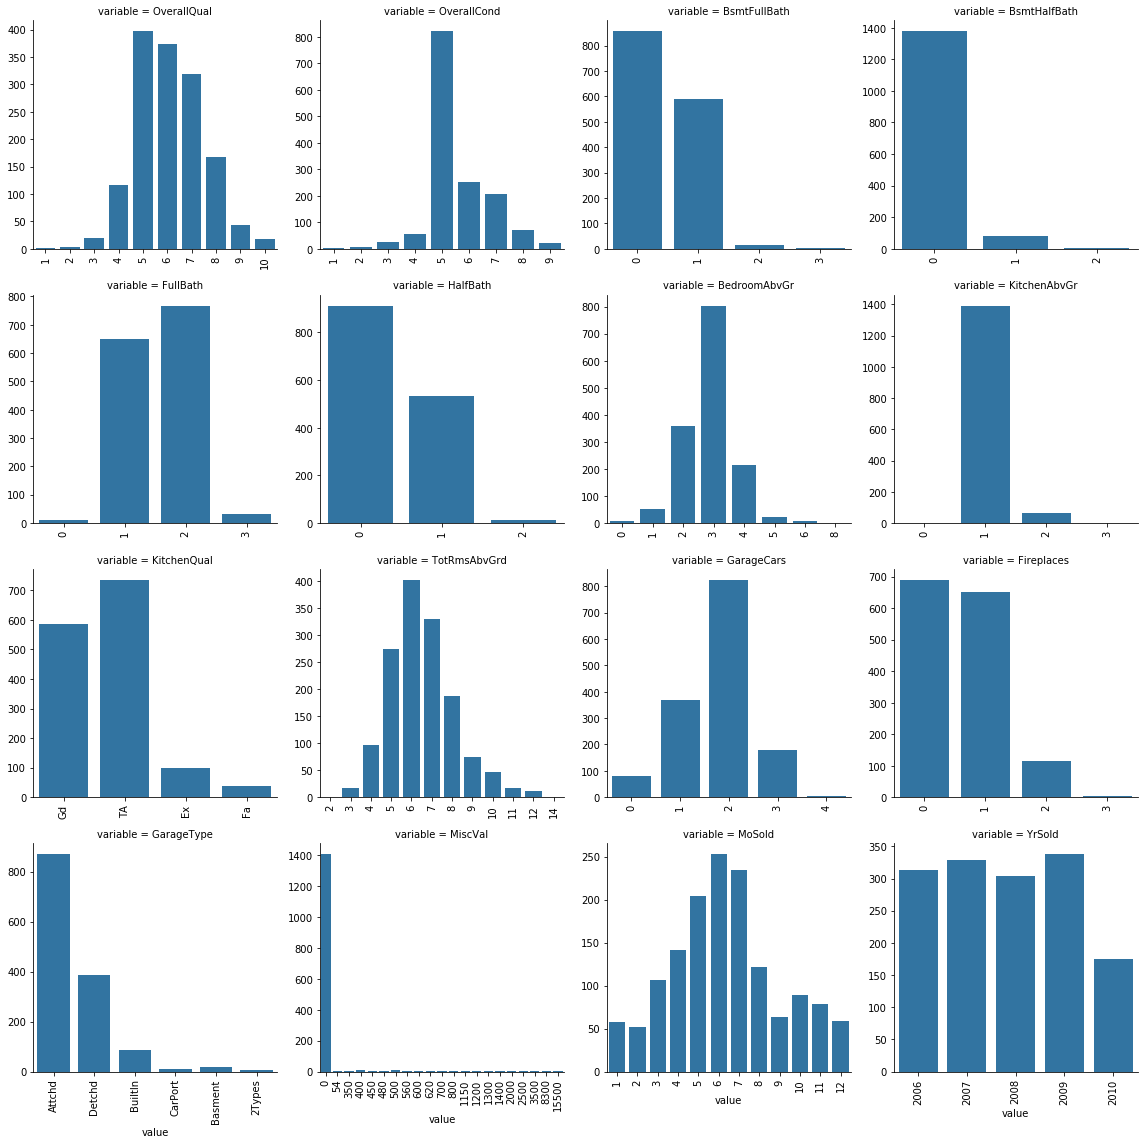

In [41]:
#melting the dataframe to bring the data into single column
CategoricalConData=df[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','GarageCars',
'Fireplaces','GarageType','MiscVal','MoSold','YrSold']].copy()

CategoricalConDataMelt=CategoricalConData.melt()

#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(CategoricalConDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countplot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

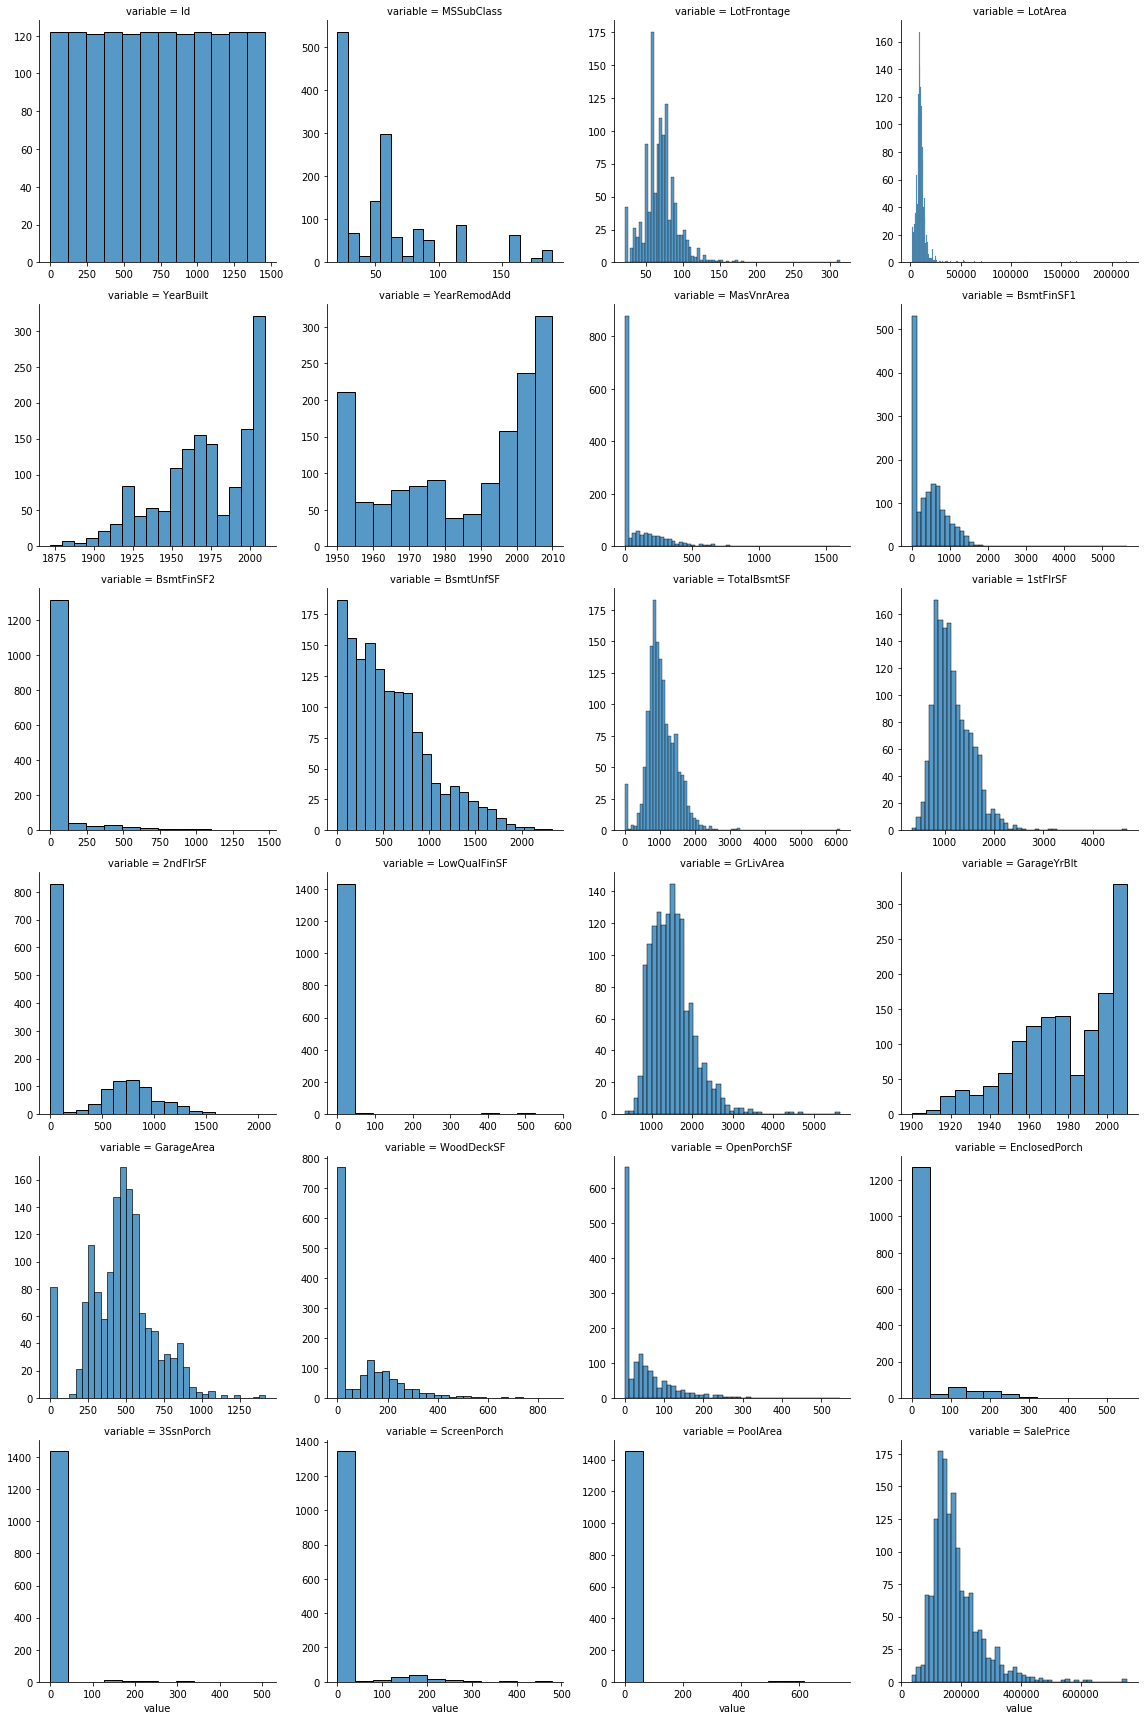

In [19]:
#histograms for numerical variables
NumericData.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars',
'Fireplaces','MiscVal','MoSold','YrSold'],axis=1,inplace=True)
NumericDataMelt=NumericData.melt()

CatFacetGrid = sns.FacetGrid(NumericDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
#CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.histplot,'value')
plt.show()

In [21]:
NumericData.shape

(1460, 24)

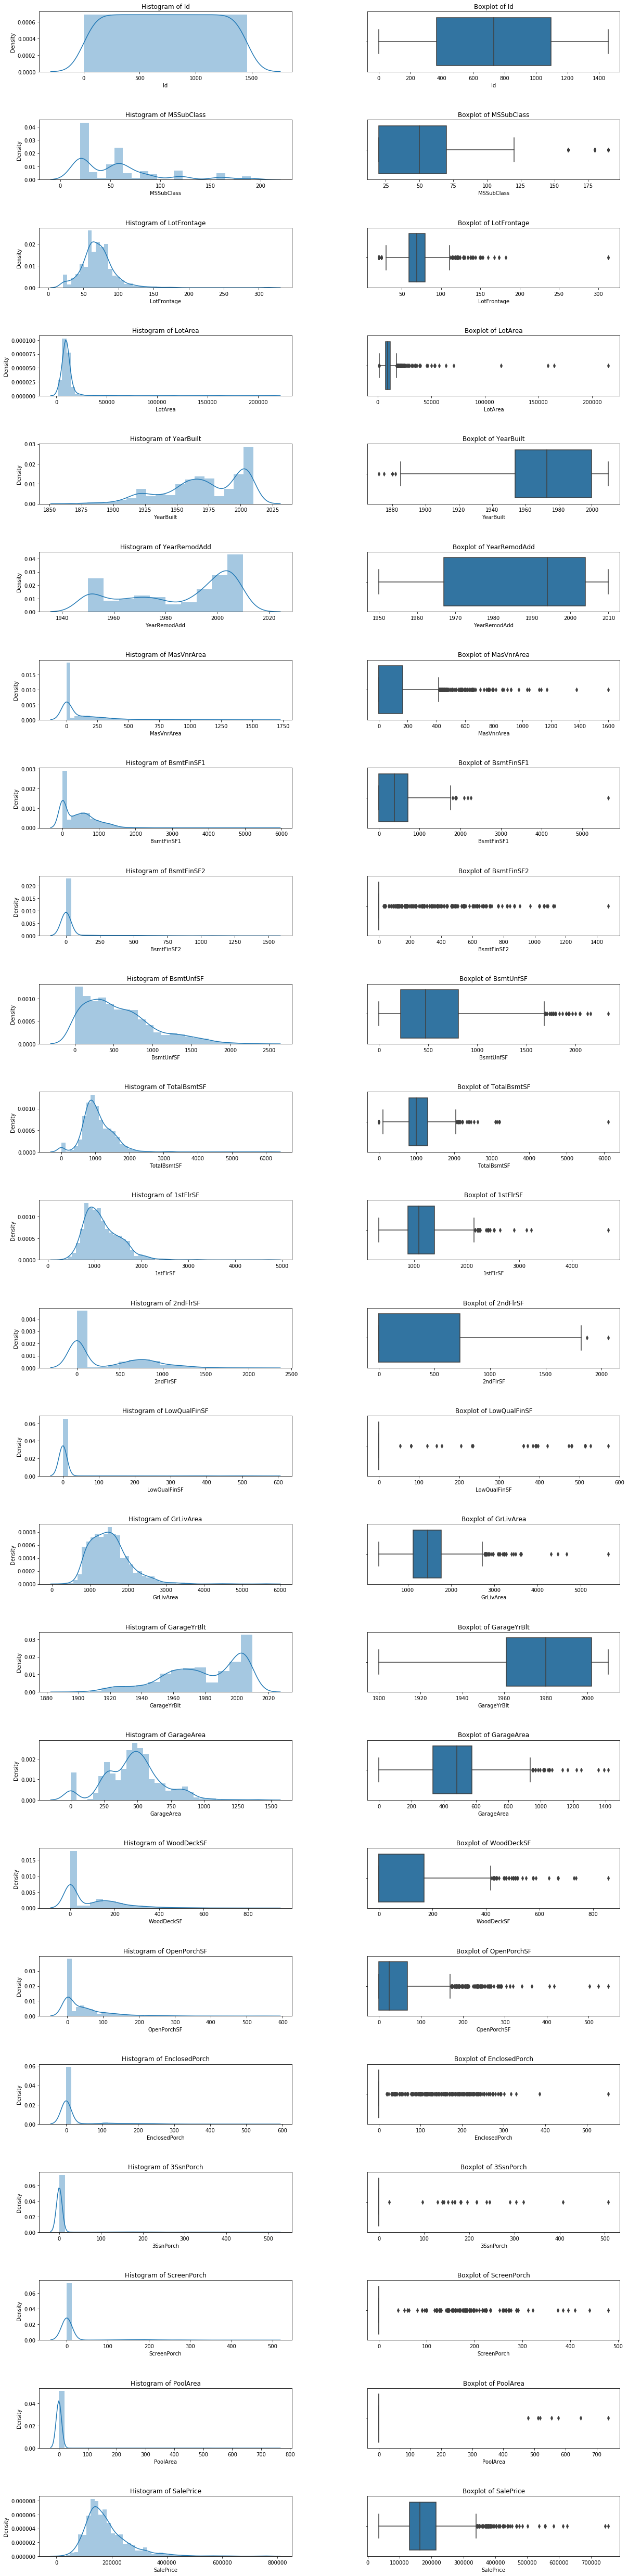

In [22]:
#distplot and boxplots for numerical variables
fig, axes = plt.subplots(nrows=24,ncols=2,  figsize=(20, 90))
fig.subplots_adjust(hspace = .8, wspace=.3)
i = 0
for col in NumericData.columns:
    if NumericData[col].dtype == 'int64' or NumericData[col].dtype == 'float64':
        sns.distplot(NumericData[col], ax=axes[i][0]).set_title("Histogram of " + col)
        sns.boxplot(NumericData[col], ax=axes[i][1]).set_title("Boxplot of " + col)
        i = i + 1

### Bivariate analysis(with SalePrice)

In [23]:
CategoricalConData.columns

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'Fireplaces', 'GarageType', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of YrSold')

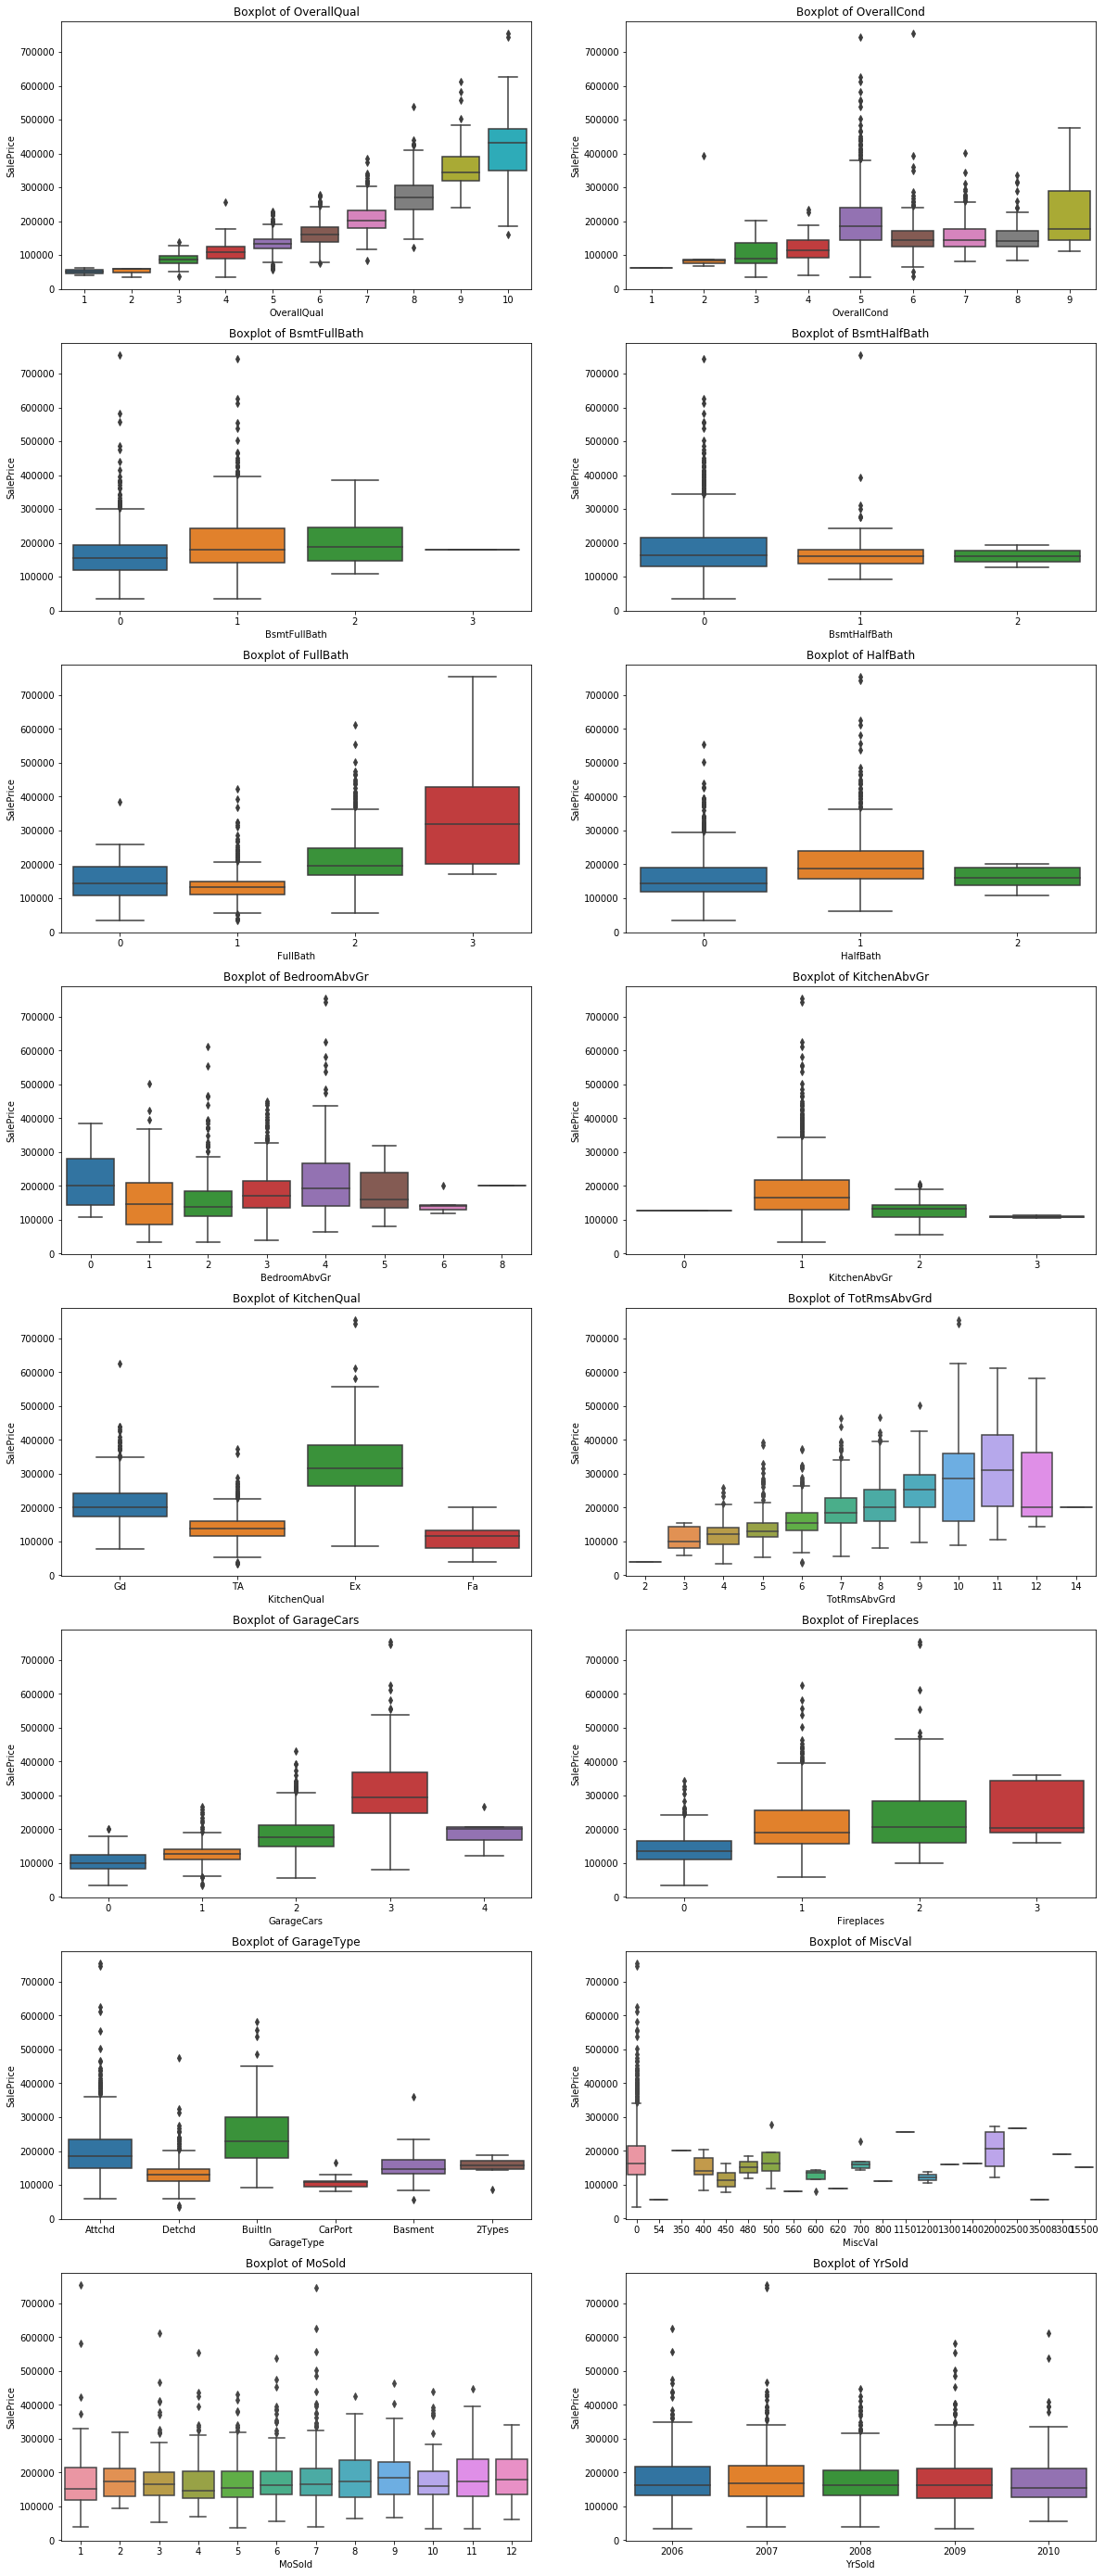

In [24]:
size = (20, 50)
CategoricalConData['SalePrice']=df['SalePrice']

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .2, wspace=.2)

sns.boxplot(x=CategoricalConData['OverallQual'],y=CategoricalConData['SalePrice'],ax=axs[0][0], ).set_title("Boxplot of OverallQual")
sns.boxplot(x=CategoricalConData['OverallCond'],y=CategoricalConData['SalePrice'],ax=axs[0][1] ).set_title("Boxplot of OverallCond")

sns.boxplot(x=CategoricalConData['BsmtFullBath'],y=CategoricalConData['SalePrice'],ax=axs[1][0], ).set_title("Boxplot of BsmtFullBath")
sns.boxplot(x=CategoricalConData['BsmtHalfBath'],y=CategoricalConData['SalePrice'],ax=axs[1][1] ).set_title("Boxplot of BsmtHalfBath")

sns.boxplot(x=CategoricalConData['FullBath'],y=CategoricalConData['SalePrice'],ax=axs[2][0], ).set_title("Boxplot of FullBath")
sns.boxplot(x=CategoricalConData['HalfBath'],y=CategoricalConData['SalePrice'],ax=axs[2][1] ).set_title("Boxplot of HalfBath")

sns.boxplot(x=CategoricalConData['BedroomAbvGr'],y=CategoricalConData['SalePrice'],ax=axs[3][0], ).set_title("Boxplot of BedroomAbvGr")
sns.boxplot(x=CategoricalConData['KitchenAbvGr'],y=CategoricalConData['SalePrice'],ax=axs[3][1] ).set_title("Boxplot of KitchenAbvGr")

sns.boxplot(x=CategoricalConData['KitchenQual'],y=CategoricalConData['SalePrice'],ax=axs[4][0], ).set_title("Boxplot of KitchenQual")
sns.boxplot(x=CategoricalConData['TotRmsAbvGrd'],y=CategoricalConData['SalePrice'],ax=axs[4][1] ).set_title("Boxplot of TotRmsAbvGrd")

sns.boxplot(x=CategoricalConData['GarageCars'],y=CategoricalConData['SalePrice'],ax=axs[5][0], ).set_title("Boxplot of GarageCars")
sns.boxplot(x=CategoricalConData['Fireplaces'],y=CategoricalConData['SalePrice'],ax=axs[5][1] ).set_title("Boxplot of Fireplaces")

sns.boxplot(x=CategoricalConData['GarageType'],y=CategoricalConData['SalePrice'],ax=axs[6][0], ).set_title("Boxplot of GarageType")
sns.boxplot(x=CategoricalConData['MiscVal'],y=CategoricalConData['SalePrice'],ax=axs[6][1] ).set_title("Boxplot of MiscVal")

sns.boxplot(x=CategoricalConData['MoSold'],y=CategoricalConData['SalePrice'],ax=axs[7][0], ).set_title("Boxplot of MoSold")
sns.boxplot(x=CategoricalConData['YrSold'],y=CategoricalConData['SalePrice'],ax=axs[7][1] ).set_title("Boxplot of YrSold")

In [26]:
CategoricData['SalePrice']=df['SalePrice'].copy()

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Shng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'CmentBd'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Brk Cmn'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'CBlock')]

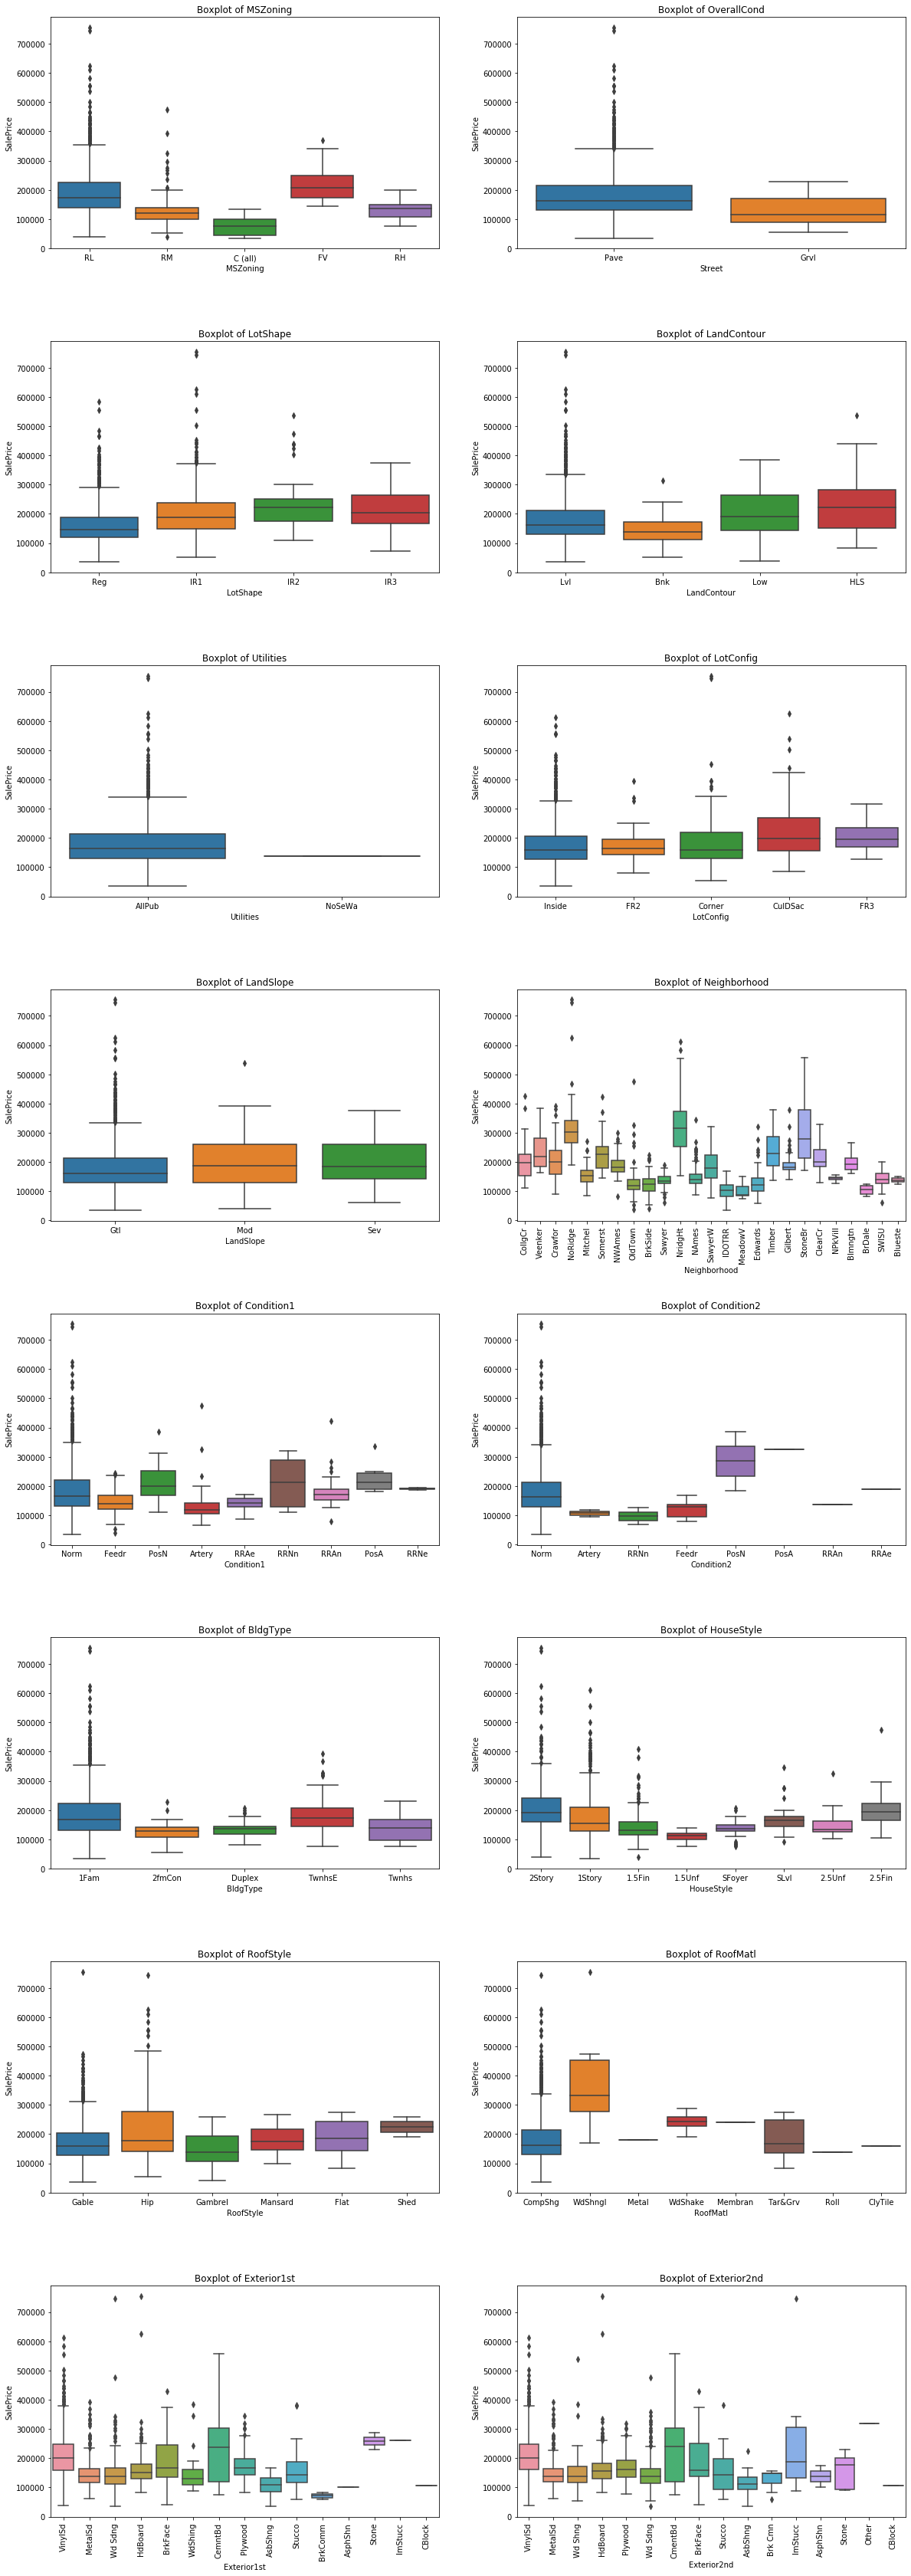

In [27]:
size = (20, 60)

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .4, wspace=.2)

sns.boxplot(x=CategoricData['MSZoning'],y=CategoricData['SalePrice'],ax=axs[0][0], ).set_title("Boxplot of MSZoning")
sns.boxplot(x=CategoricData['Street'],y=CategoricData['SalePrice'],ax=axs[0][1] ).set_title("Boxplot of OverallCond")

sns.boxplot(x=CategoricData['LotShape'],y=CategoricData['SalePrice'],ax=axs[1][0], ).set_title("Boxplot of LotShape")
sns.boxplot(x=CategoricData['LandContour'],y=CategoricData['SalePrice'],ax=axs[1][1] ).set_title("Boxplot of LandContour")

sns.boxplot(x=CategoricData['Utilities'],y=CategoricData['SalePrice'],ax=axs[2][0], ).set_title("Boxplot of Utilities")
sns.boxplot(x=CategoricData['LotConfig'],y=CategoricData['SalePrice'],ax=axs[2][1] ).set_title("Boxplot of LotConfig")

sns.boxplot(x=CategoricData['LandSlope'],y=CategoricData['SalePrice'],ax=axs[3][0], ).set_title("Boxplot of LandSlope")
ax=sns.boxplot(x=CategoricData['Neighborhood'],y=CategoricData['SalePrice'],ax=axs[3][1] )
ax.set_title("Boxplot of Neighborhood")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

sns.boxplot(x=CategoricData['Condition1'],y=CategoricData['SalePrice'],ax=axs[4][0], ).set_title("Boxplot of Condition1")
sns.boxplot(x=CategoricData['Condition2'],y=CategoricData['SalePrice'],ax=axs[4][1] ).set_title("Boxplot of Condition2")

sns.boxplot(x=CategoricData['BldgType'],y=CategoricData['SalePrice'],ax=axs[5][0], ).set_title("Boxplot of BldgType")
sns.boxplot(x=CategoricData['HouseStyle'],y=CategoricData['SalePrice'],ax=axs[5][1] ).set_title("Boxplot of HouseStyle")

sns.boxplot(x=CategoricData['RoofStyle'],y=CategoricData['SalePrice'],ax=axs[6][0], ).set_title("Boxplot of RoofStyle")
sns.boxplot(x=CategoricData['RoofMatl'],y=CategoricData['SalePrice'],ax=axs[6][1] ).set_title("Boxplot of RoofMatl")

ax=sns.boxplot(x=CategoricData['Exterior1st'],y=CategoricData['SalePrice'],ax=axs[7][0], )
ax.set_title("Boxplot of Exterior1st")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax=sns.boxplot(x=CategoricData['Exterior2nd'],y=CategoricData['SalePrice'],ax=axs[7][1] )
ax.set_title("Boxplot of Exterior2nd")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


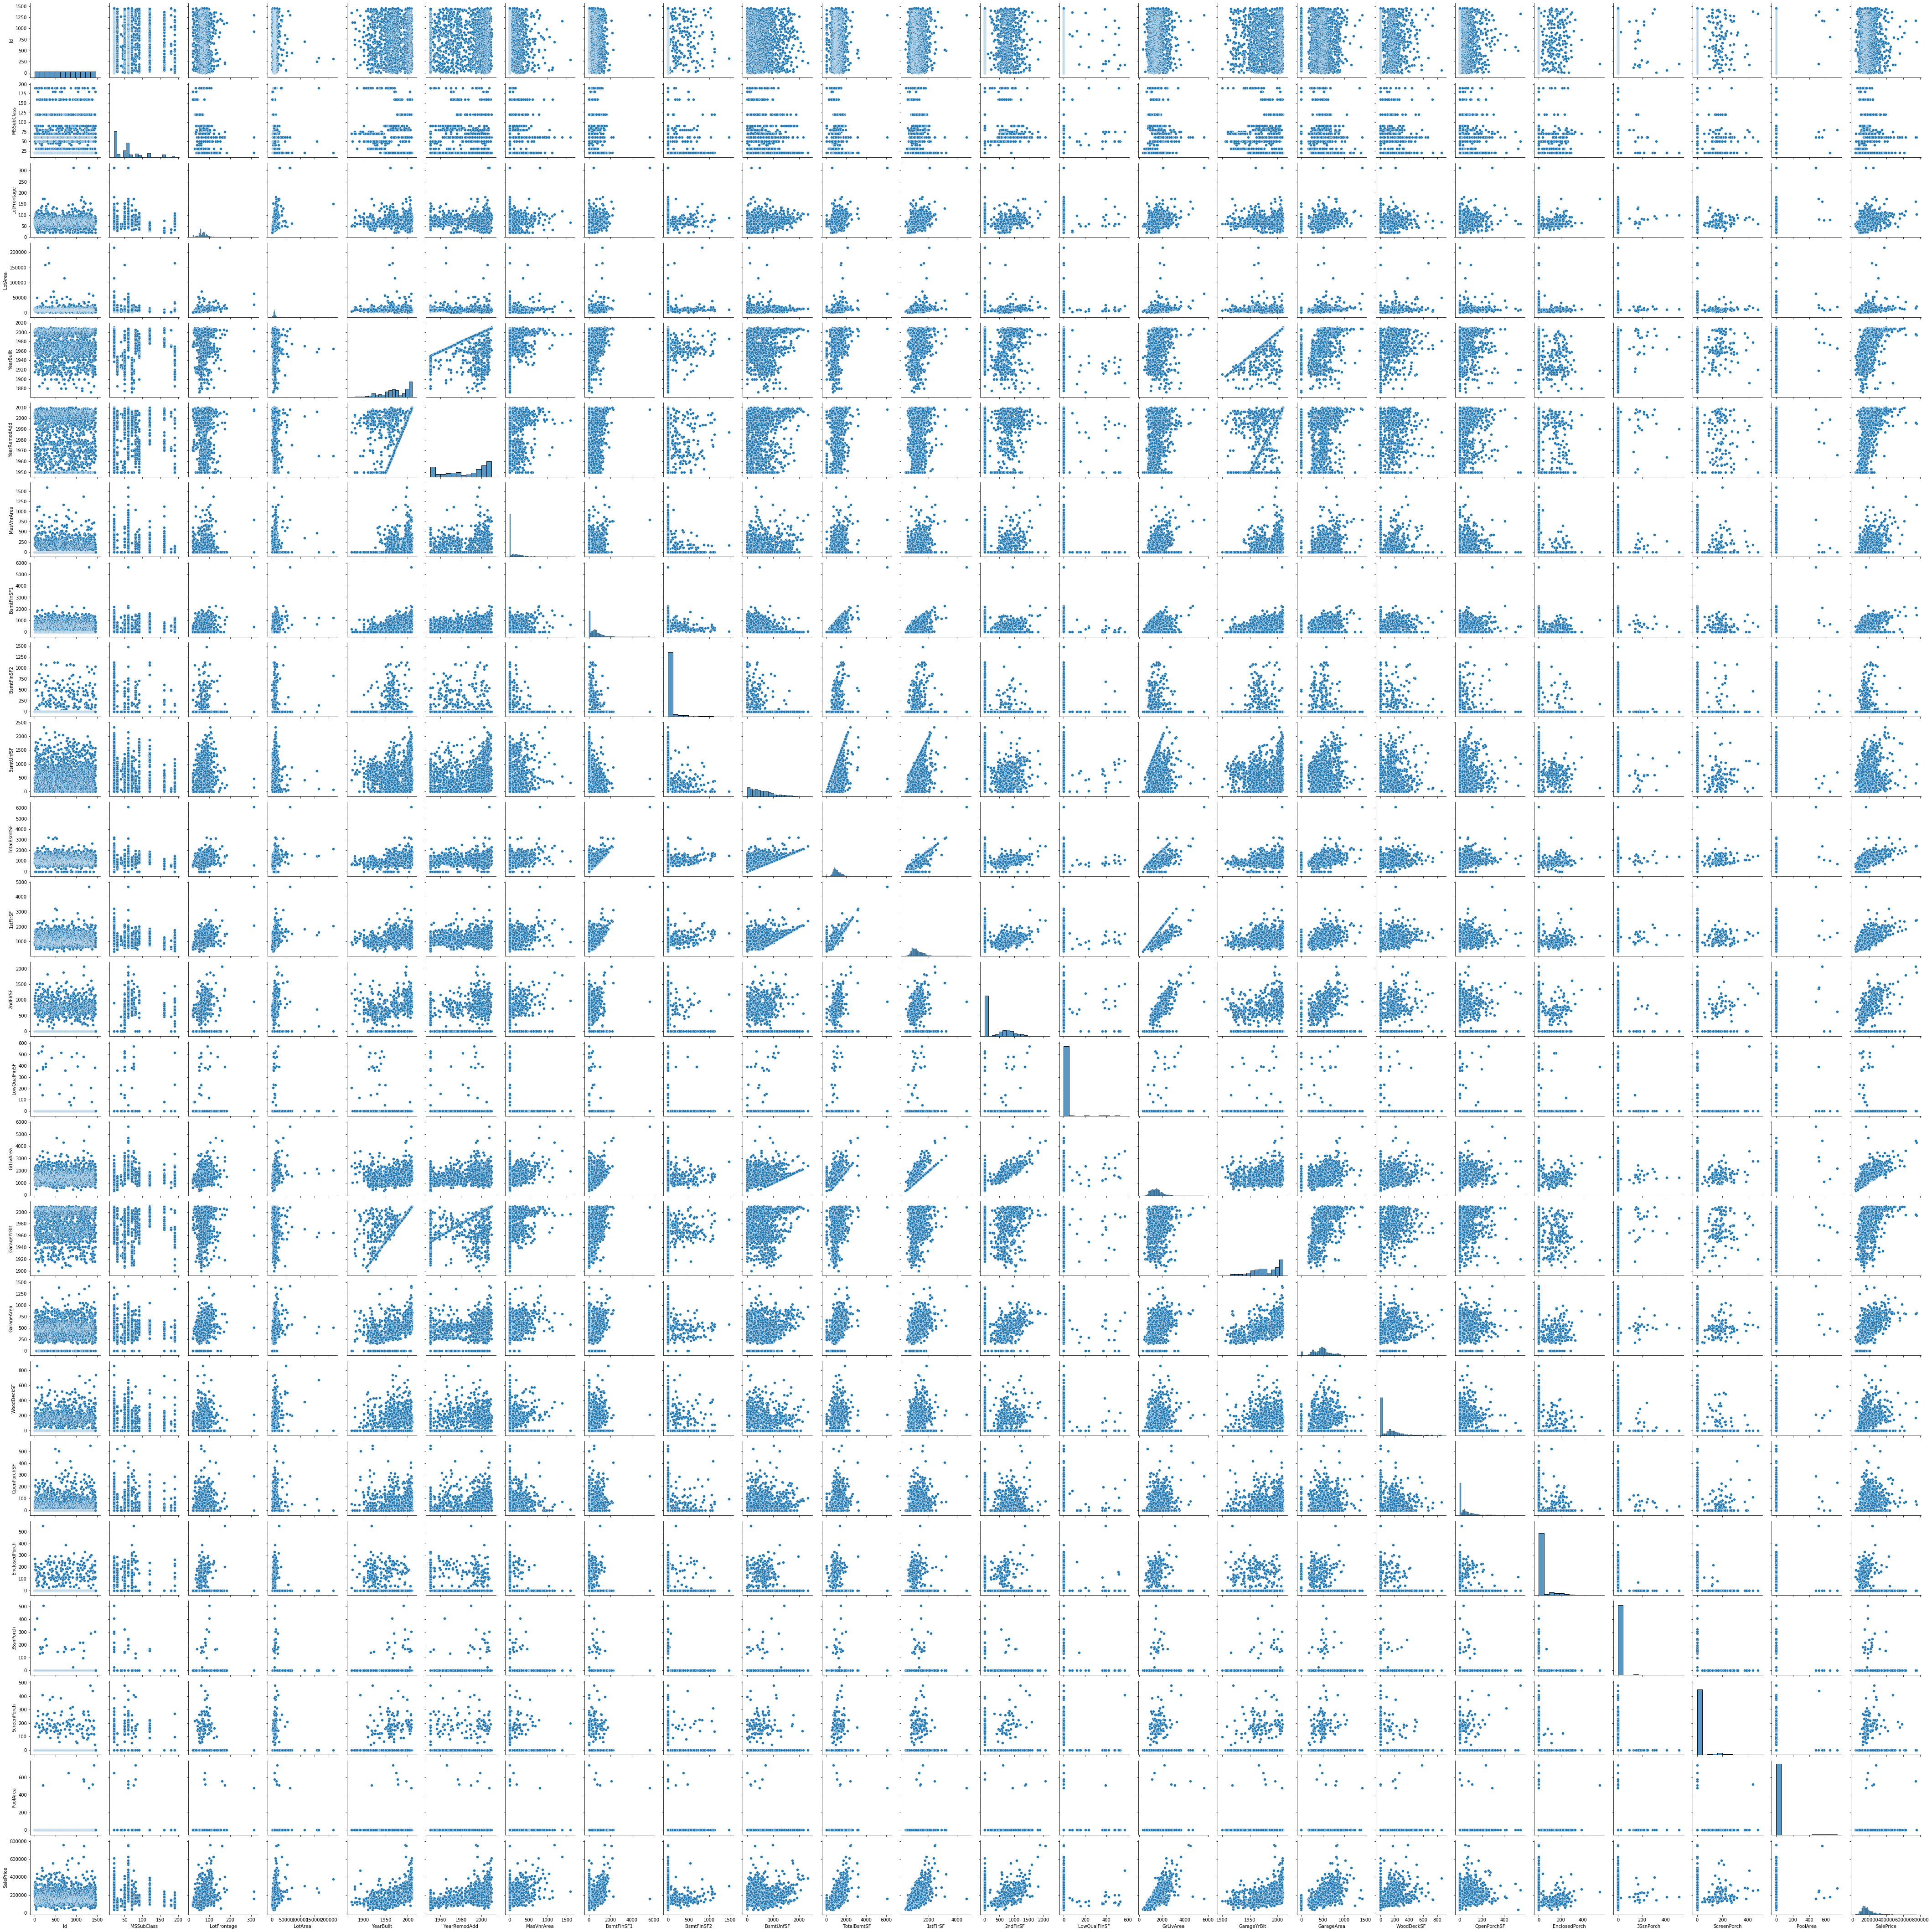

In [29]:
#Bivariate Analysis for actual categorical Variables with Attrition
NumericData['SalePrice']=df['SalePrice']
sns.pairplot(NumericData)

In [116]:
#we will focus only on the saleprice line

Id


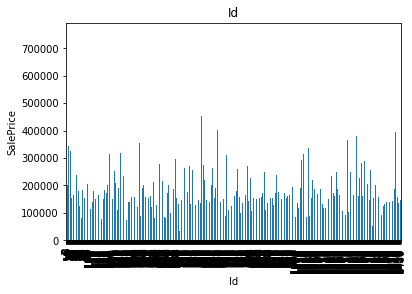

MSSubClass


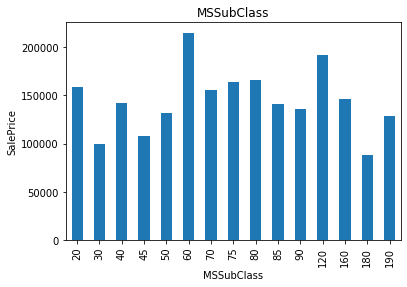

LotFrontage


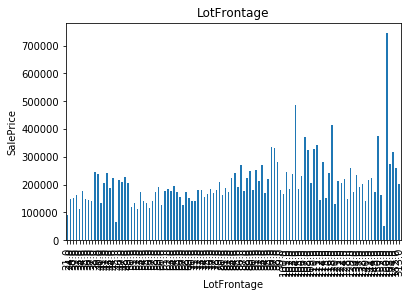

LotArea


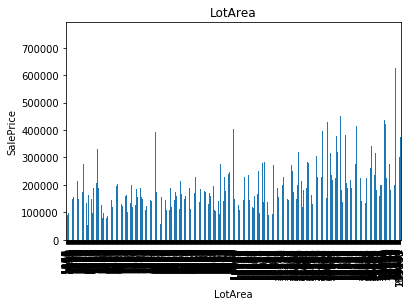

YearBuilt


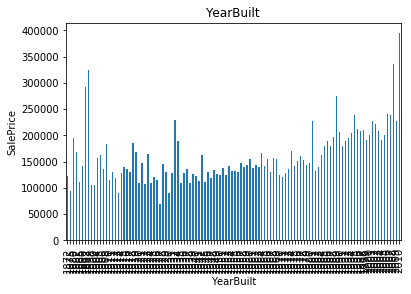

YearRemodAdd


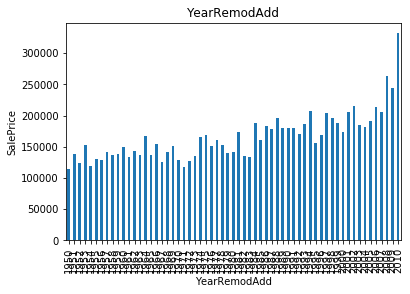

MasVnrArea


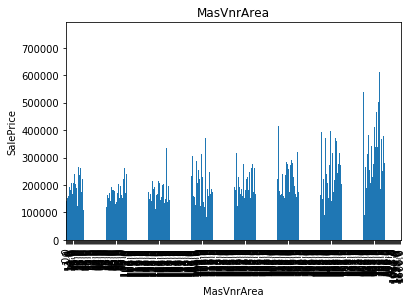

BsmtFinSF1


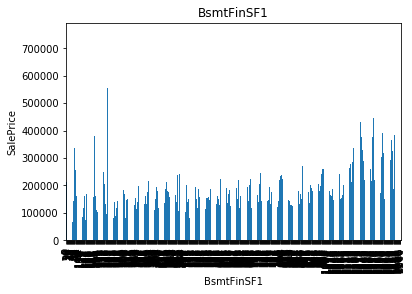

BsmtFinSF2


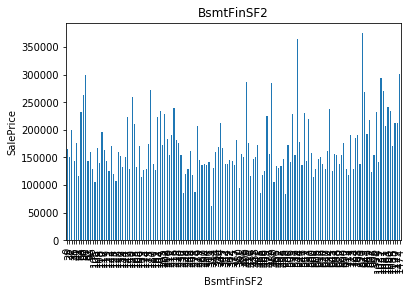

BsmtUnfSF


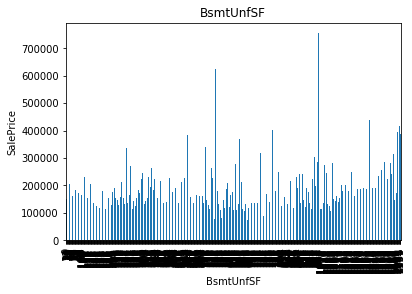

TotalBsmtSF


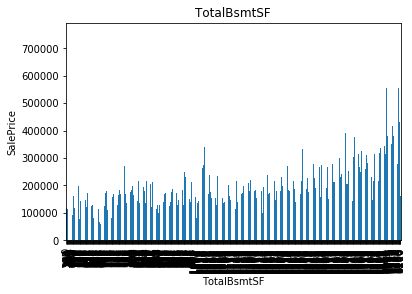

1stFlrSF


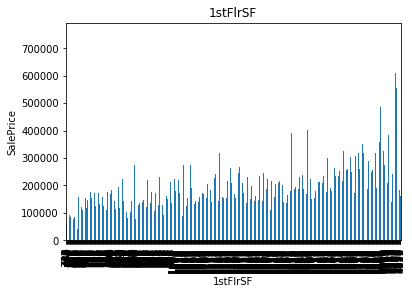

2ndFlrSF


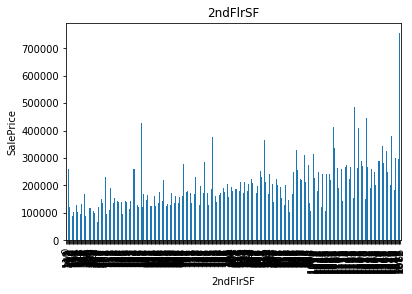

LowQualFinSF


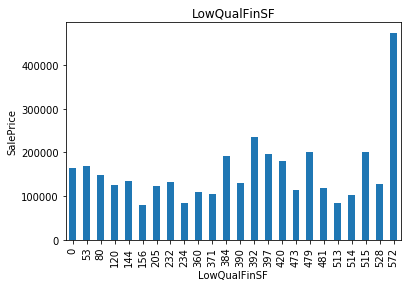

GrLivArea


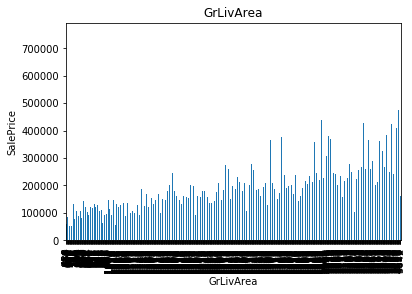

GarageYrBlt


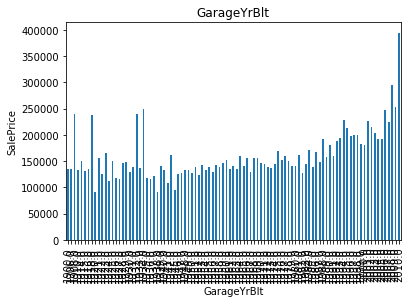

GarageArea


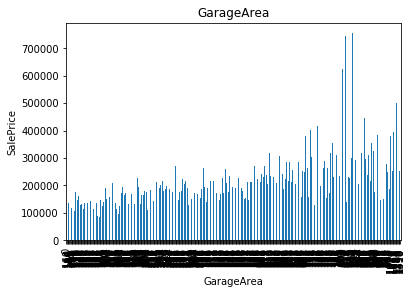

WoodDeckSF


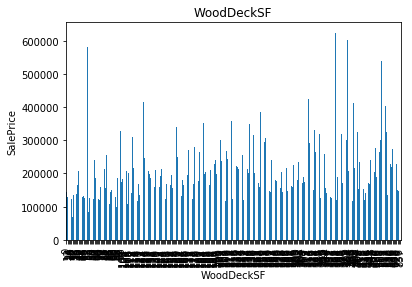

OpenPorchSF


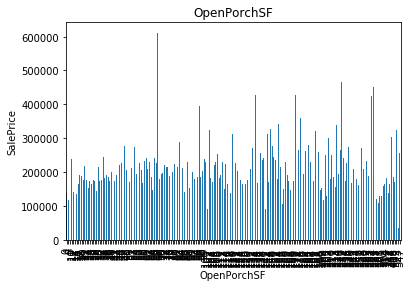

EnclosedPorch


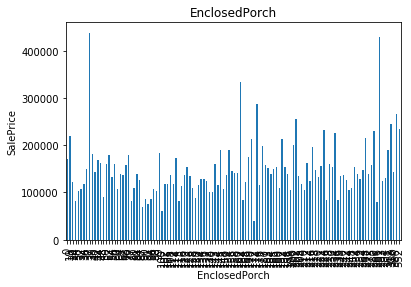

3SsnPorch


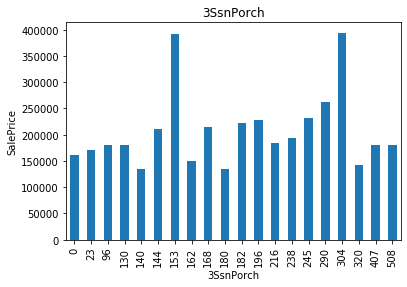

ScreenPorch


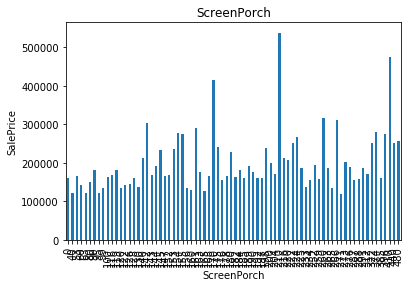

PoolArea


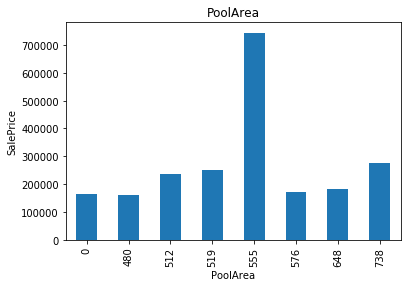

SalePrice


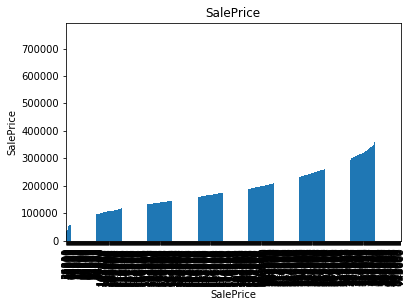

In [49]:
for feature in NumericData:
    data=df.copy()
    print(feature)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

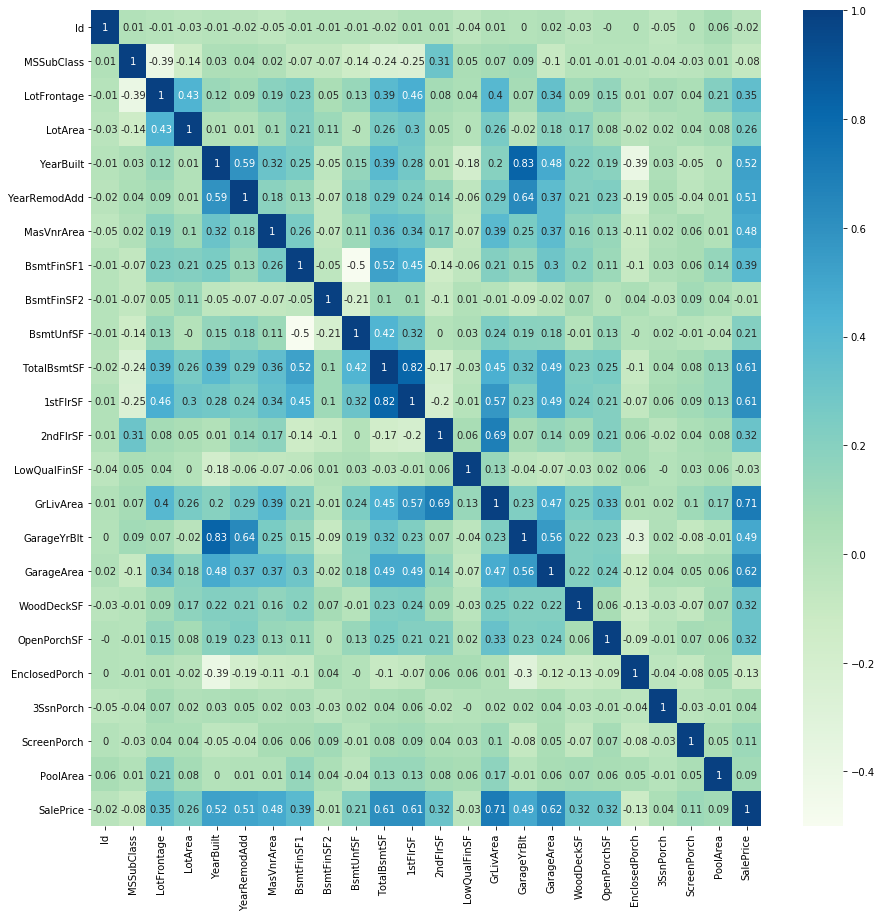

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(round(NumericData.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

#these are the features which affect the Saleprice positively
LotFrontage,LotArea,OverallQual,OverallCond,YearBulit,YearRemodAdd,MarsVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,
2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt are positively correlated with SalesPrice

### Now for Year Based column

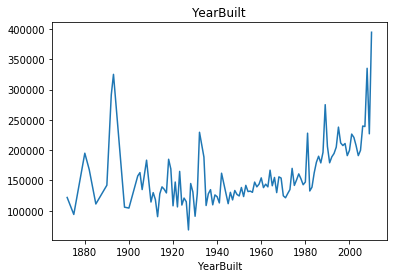

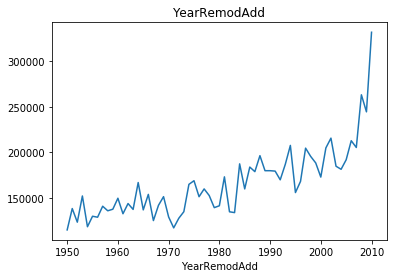

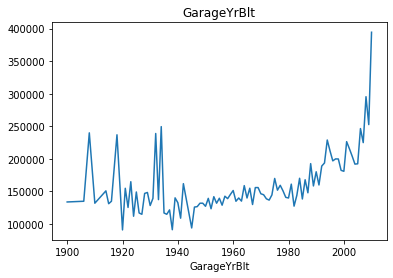

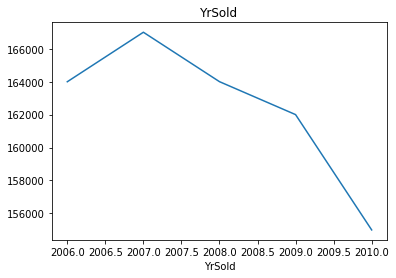

In [31]:
#['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] these are year based columns
year_feature=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for yr in year_feature:
    df.groupby(yr)['SalePrice'].median().plot()
    plt.title(yr)
    plt.show()

# Missing values

In [29]:
df.drop(['Id'],axis=1,inplace=True)

In [30]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [31]:
#before that we had decided to drop these columns Alley,PoolQC,Fence,MiscFeature  because they had missing values more than 80%
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [32]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

In [33]:
#The goal is to fill numerical column with mean and categorical column with mode
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True) #->numerical
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True) #->categorical
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True) #->numerical
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True) #->categorical
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True) #->categorical
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True) #->categorical
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True) #->categorical
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True) #->categorical
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True) #->categorical
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True) #->categorica on hold as i want to use knn imputer for this
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True) #->categorical
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True) #->numerical (putting it on hold)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True) #->categorical
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True) #->categorical
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True) #->categorical


In [34]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [35]:
#doing label encoding before checking for outliers
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

In [36]:
df.skew()

MSSubClass        1.407657
MSZoning         -1.735395
LotFrontage       2.384950
LotArea          12.207688
Street          -15.518770
                   ...    
MoSold            0.212053
YrSold            0.096269
SaleType         -3.868638
SaleCondition    -2.741167
SalePrice         1.882876
Length: 76, dtype: float64

In [37]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [38]:
df.skew()

MSSubClass        0.566919
MSZoning         -5.430165
LotFrontage      -0.113125
LotArea           2.249731
Street          -15.518770
                   ...    
MoSold            0.212053
YrSold            0.096269
SaleType         -5.067571
SaleCondition    -3.290968
SalePrice         0.666768
Length: 76, dtype: float64

# Outliers

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.31593282, 0.06092174, 0.14007433, ..., 0.24253354, 0.2587641 ,
        0.50139428],
       [1.05715037, 0.06092174, 0.54558168, ..., 0.24253354, 0.2587641 ,
        0.14482513],
       [0.31593282, 0.06092174, 0.00491091, ..., 0.24253354, 0.2587641 ,
        0.68630807],
       ...,
       [0.55203479, 0.06092174, 0.09125934, ..., 0.24253354, 0.2587641 ,
        1.17428114],
       [1.05715037, 0.06092174, 0.00491091, ..., 0.24253354, 0.2587641 ,
        0.44514087],
       [1.05715037, 0.06092174, 0.32736132, ..., 0.24253354, 0.2587641 ,
        0.35865357]])

In [40]:
#Lets see how much data is being removed if more data is being removd then we will use percentile
threshold=6
print(np.where(z>6))

(array([   5,    9,   17,   24,   30,   39,   46,   48,   51,   52,   53,
         55,   88,   88,   90,   93,  102,  120,  125,  129,  145,  153,
        155,  156,  159,  169,  170,  182,  182,  185,  185,  185,  187,
        190,  193,  197,  197,  197,  198,  205,  224,  233,  237,  249,
        253,  258,  259,  260,  263,  263,  267,  268,  268,  278,  280,
        304,  309,  313,  322,  324,  335,  335,  342,  342,  343,  346,
        349,  362,  362,  367,  371,  375,  375,  378,  389,  392,  406,
        435,  440,  451,  457,  466,  471,  473,  495,  508,  510,  514,
        520,  529,  532,  533,  539,  542,  546,  553,  557,  577,  582,
        583,  586,  588,  610,  629,  635,  635,  636,  636,  646,  664,
        666,  691,  691,  697,  704,  705,  705,  706,  711,  726,  729,
        736,  744,  745,  749,  749,  759,  760,  760,  778,  809,  810,
        812,  812,  828,  828,  842,  868,  873,  883,  888,  889,  890,
        894,  897,  908,  916,  934,  934,  941,  

In [41]:
#Lets see how much data is being removed if more data is being removd then we will use percentile
dfwithoutalloutliers=df[(z<7.4).all(axis=1)]
dfwithoutalloutliers

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
0       3.914868   1.44225     4.020726  20.368181     1.0   1.44225   
1       2.714418   1.44225     4.308869  21.253171     1.0   1.44225   
2       3.914868   1.44225     4.081655  22.407024     1.0   0.00000   
3       4.121285   1.44225     3.914868  21.216209     1.0   0.00000   
4       3.914868   1.44225     4.379519  24.249708     1.0   0.00000   
...          ...       ...          ...        ...     ...       ...   
1455    3.914868   1.44225     3.957892  19.930593     1.0   1.44225   
1456    2.714418   1.44225     4.396830  23.618386     1.0   1.44225   
1457    4.121285   1.44225     4.041240  20.833145     1.0   1.44225   
1458    2.714418   1.44225     4.081655  21.339164     1.0   1.44225   
1459    2.714418   1.44225     4.217163  21.499008     1.0   1.44225   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0         1.44225        0.0   1.587401        0.0  ...       0.000000   
1         1.44225        0.0   1.259921        0.0  ...       0.000000   
2         1.44225        0.0   1.587401        0.0  ...       0.000000   
3         1.44225        0.0   0.000000        0.0  ...       6.479224   
4         1.44225        0.0   1.259921        0.0  ...       0.000000   
...           ...        ...        ...        ...  ...            ...   
1455      1.44225        0.0   1.587401        0.0  ...       0.000000   
1456      1.44225        0.0   1.587401        0.0  ...       0.000000   
1457      1.44225        0.0   1.587401        0.0  ...       0.000000   
1458      1.44225        0.0   1.587401        0.0  ...       4.820285   
1459      1.44225        0.0   1.587401        0.0  ...       0.000000   

      3SsnPorch  ScreenPorch  PoolArea    MiscVal  MoSold  YrSold  SaleType  \
0           0.0          0.0       0.0   0.000000       2    2008       2.0   
1           0.0          0.0       0.0   0.000000       5    2007       2.0   
2           0.0          0.0       0.0   0.000000       9    2008       2.0   
3           0.0          0.0       0.0   0.000000       2    2006       2.0   
4           0.0          0.0       0.0   0.000000      12    2008       2.0   
...         ...          ...       ...        ...     ...     ...       ...   
1455        0.0          0.0       0.0   0.000000       8    2007       2.0   
1456        0.0          0.0       0.0   0.000000       2    2010       2.0   
1457        0.0          0.0       0.0  13.572088       5    2010       2.0   
1458        0.0          0.0       0.0   0.000000       4    2010       2.0   
1459        0.0          0.0       0.0   0.000000       6    2008       2.0   

      SaleCondition  SalePrice  
0          1.587401  59.297359  
1          1.587401  56.618567  
2          1.587401  60.686558  
3          0.000000  51.924941  
4          1.587401  62.996052  
...             ...        ...  
1455       1.587401  55.934447  
1456       1.587401  59.439220  
1457       1.587401  64.352547  
1458       1.587401  52.186338  
1459       1.587401  52.836090  

[1346 rows x 76 columns]

In [42]:
(1346/1406)*100

95.7325746799431

In [43]:
#so we are left with only  43% data with threshold =3
#we are left with only  79.65% data with threshold =5 that is excluding dropped column
#we are left with only  90% data with threshold =6 that is excluding dropped column
#we are left with only  95% data with threshold =7.4 that is excluding dropped column
df

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
0       3.914868   1.44225     4.020726  20.368181     1.0   1.44225   
1       2.714418   1.44225     4.308869  21.253171     1.0   1.44225   
2       3.914868   1.44225     4.081655  22.407024     1.0   0.00000   
3       4.121285   1.44225     3.914868  21.216209     1.0   0.00000   
4       3.914868   1.44225     4.379519  24.249708     1.0   0.00000   
...          ...       ...          ...        ...     ...       ...   
1455    3.914868   1.44225     3.957892  19.930593     1.0   1.44225   
1456    2.714418   1.44225     4.396830  23.618386     1.0   1.44225   
1457    4.121285   1.44225     4.041240  20.833145     1.0   1.44225   
1458    2.714418   1.44225     4.081655  21.339164     1.0   1.44225   
1459    2.714418   1.44225     4.217163  21.499008     1.0   1.44225   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0         1.44225        0.0   1.587401        0.0  ...       0.000000   
1         1.44225        0.0   1.259921        0.0  ...       0.000000   
2         1.44225        0.0   1.587401        0.0  ...       0.000000   
3         1.44225        0.0   0.000000        0.0  ...       6.479224   
4         1.44225        0.0   1.259921        0.0  ...       0.000000   
...           ...        ...        ...        ...  ...            ...   
1455      1.44225        0.0   1.587401        0.0  ...       0.000000   
1456      1.44225        0.0   1.587401        0.0  ...       0.000000   
1457      1.44225        0.0   1.587401        0.0  ...       0.000000   
1458      1.44225        0.0   1.587401        0.0  ...       4.820285   
1459      1.44225        0.0   1.587401        0.0  ...       0.000000   

      3SsnPorch  ScreenPorch  PoolArea    MiscVal  MoSold  YrSold  SaleType  \
0           0.0          0.0       0.0   0.000000       2    2008       2.0   
1           0.0          0.0       0.0   0.000000       5    2007       2.0   
2           0.0          0.0       0.0   0.000000       9    2008       2.0   
3           0.0          0.0       0.0   0.000000       2    2006       2.0   
4           0.0          0.0       0.0   0.000000      12    2008       2.0   
...         ...          ...       ...        ...     ...     ...       ...   
1455        0.0          0.0       0.0   0.000000       8    2007       2.0   
1456        0.0          0.0       0.0   0.000000       2    2010       2.0   
1457        0.0          0.0       0.0  13.572088       5    2010       2.0   
1458        0.0          0.0       0.0   0.000000       4    2010       2.0   
1459        0.0          0.0       0.0   0.000000       6    2008       2.0   

      SaleCondition  SalePrice  
0          1.587401  59.297359  
1          1.587401  56.618567  
2          1.587401  60.686558  
3          0.000000  51.924941  
4          1.587401  62.996052  
...             ...        ...  
1455       1.587401  55.934447  
1456       1.587401  59.439220  
1457       1.587401  64.352547  
1458       1.587401  52.186338  
1459       1.587401  52.836090  

[1460 rows x 76 columns]

In [44]:
dfwithoutalloutliers['TotalSF'] = dfwithoutalloutliers['TotalBsmtSF'] + dfwithoutalloutliers['1stFlrSF'] + dfwithoutalloutliers['2ndFlrSF']


In [45]:
dfwithoutalloutliers.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF',],axis=1,inplace=True)

# ML(Regression)

In [46]:
x=dfwithoutalloutliers.drop(['SalePrice'],axis=1) 
y=dfwithoutalloutliers['SalePrice']

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
newx=sc.transform(x)

In [48]:
#pca
#Lets use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=59)
x_pca=pca.fit_transform(newx)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :0.9753209568817127


In [49]:
#Lets use decision tree regressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
def maxr2_score(regr,x_pca,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [50]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=10,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [51]:
regr=DecisionTreeRegressor()
final_r_state=maxr2_score(regr,x_pca,y)

r2 score corresponding to  42  is  0.6533142227092801
r2 score corresponding to  43  is  0.6827717800995655
r2 score corresponding to  44  is  0.7029007476450206
r2 score corresponding to  45  is  0.6687704044824647
r2 score corresponding to  46  is  0.6489083910917257
r2 score corresponding to  47  is  0.6447919844986005
r2 score corresponding to  48  is  0.7080258812897542
r2 score corresponding to  49  is  0.7009099514074668
r2 score corresponding to  50  is  0.6515032047748989
r2 score corresponding to  51  is  0.6986921044092322
r2 score corresponding to  52  is  0.6665376030312025
r2 score corresponding to  53  is  0.6453980704431836
r2 score corresponding to  54  is  0.630786615359984
r2 score corresponding to  55  is  0.6589971499345169
r2 score corresponding to  56  is  0.7290037760600663
r2 score corresponding to  57  is  0.6643054054852453
r2 score corresponding to  58  is  0.6344050414184857
r2 score corresponding to  59  is  0.6977973974604803
r2 score corresponding to  60

In [81]:
print("Decision Tree regression\n\n")
model_evaluation(regr,x_pca,y)

Decision Tree regression


Mean r2 score for regressor:  0.694138380421184
standard deviation in r2 score for regressor:  0.04523883684947288
[0.75028252 0.61597644 0.72455482 0.68760655 0.69227157]


In [53]:
#lets use ensemble model Random forets
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)#for random forest scaling is required
clf.best_params_

{'n_estimators': 500}

In [54]:
rfr=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.8611650298621238
r2 score corresponding to  43  is  0.8293847880491257
r2 score corresponding to  44  is  0.8269253549702134
r2 score corresponding to  45  is  0.8242405348021259
r2 score corresponding to  46  is  0.8263870907278401
r2 score corresponding to  47  is  0.8151026110446217
r2 score corresponding to  48  is  0.8777676944868823
r2 score corresponding to  49  is  0.8400519057548472
r2 score corresponding to  50  is  0.8128233705974272
r2 score corresponding to  51  is  0.8263149949819837
r2 score corresponding to  52  is  0.8388536674758102
r2 score corresponding to  53  is  0.8262158628208469
r2 score corresponding to  54  is  0.8388069915754586
r2 score corresponding to  55  is  0.8397311538055929
r2 score corresponding to  56  is  0.8564088204889645
r2 score corresponding to  57  is  0.8314664470861087
r2 score corresponding to  58  is  0.8352386247948203
r2 score corresponding to  59  is  0.84686333131073
r2 score corresponding to  60 

48

In [82]:
print("Random Forest\n\n")
model_evaluation(rfr,x_pca,y)

Random Forest


Mean r2 score for regressor:  0.841924075307541
standard deviation in r2 score for regressor:  0.016812120007359578
[0.86653955 0.82182615 0.8298551  0.85640532 0.83499426]


In [56]:
#using grid search for optimal value of k in knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(2,20)}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, cv=5)
clf.fit(x_pca,y)
clf.best_params_

{'n_neighbors': 10}

In [57]:
knr=KNeighborsRegressor(n_neighbors=10)
final_r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.8052554233827978
r2 score corresponding to  43  is  0.7627597007999062
r2 score corresponding to  44  is  0.7764376199424422
r2 score corresponding to  45  is  0.7678156059731083
r2 score corresponding to  46  is  0.7797993622240929
r2 score corresponding to  47  is  0.7593735898516121
r2 score corresponding to  48  is  0.8116092566812692
r2 score corresponding to  49  is  0.7690404271056144
r2 score corresponding to  50  is  0.7878986762185158
r2 score corresponding to  51  is  0.7683336003851973
r2 score corresponding to  52  is  0.7967485347932373
r2 score corresponding to  53  is  0.7462411418534629
r2 score corresponding to  54  is  0.8013644823197039
r2 score corresponding to  55  is  0.7728370959298911
r2 score corresponding to  56  is  0.7994745186639443
r2 score corresponding to  57  is  0.7914236994663125
r2 score corresponding to  58  is  0.7901445785299737
r2 score corresponding to  59  is  0.7875773646531847
r2 score corresponding to  6

In [58]:
print("Knn regression\n\n")
model_evaluation(knr,x_pca,y)

Knn regression


Mean r2 score for regressor:  0.7907215348066945
standard deviation in r2 score for regressor:  0.026062843916681084
[0.83465379 0.77472768 0.75637068 0.79616062 0.7916949 ]


In [59]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,x_pca,y)

r2 score corresponding to  42  is  0.8992732433886245
r2 score corresponding to  43  is  0.8660754651329957
r2 score corresponding to  44  is  0.8715092262641322
r2 score corresponding to  45  is  0.8809217955953806
r2 score corresponding to  46  is  0.8166384921766379
r2 score corresponding to  47  is  0.8754149660176205
r2 score corresponding to  48  is  0.8922814222279958
r2 score corresponding to  49  is  0.8989667305054284
r2 score corresponding to  50  is  0.838416116034349
r2 score corresponding to  51  is  0.8713907906950175
r2 score corresponding to  52  is  0.8853546864059433
r2 score corresponding to  53  is  0.8251285505592344
r2 score corresponding to  54  is  0.8545120693735214
r2 score corresponding to  55  is  0.8516845936063907
r2 score corresponding to  56  is  0.8923413416103503
r2 score corresponding to  57  is  0.8839869001415025
r2 score corresponding to  58  is  0.8794357878637075
r2 score corresponding to  59  is  0.887582026642519
r2 score corresponding to  60 

In [60]:
print("Linear regression\n\n")
model_evaluation(lnr,x_pca,y)

Linear regression


Mean r2 score for regressor:  0.8787198418745966
standard deviation in r2 score for regressor:  0.01725169628199275
[0.90029765 0.84871533 0.88029829 0.88908271 0.87520523]


In [84]:
xgb_model = XGBRegressor(colsample_bytree= 0.9,
 learning_rate= 0.01,
 max_depth= 7,
 min_child_weight= 9,
 n_estimators= 1000,
 objective= 'reg:linear',
 subsample= 0.6)
final_r_state=maxr2_score(xgb_model,x_pca,y)

[10:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  42  is  0.8929265972576184
[10:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  43  is  0.8599554314478434
[10:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  44  is  0.8695650586996477
[10:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  45  is  0.8668912910311375
[10:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

r2 score corresponding to  77  is  0.8923360480879191
[10:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  78  is  0.8741128327976091
[10:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  79  is  0.8658519719741639
[10:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  80  is  0.867856152124308
[10:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2 score corresponding to  81  is  0.8647724755696992
[10:14:16] WARNING: C:/

In [62]:
#Applying xg boost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,test_size=0.20)


In [68]:
#XGBoost hyper-parameter tuning
def xgbtuning(x_pca, y):
    params = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [3, 5, 7, 9],
        'subsample': [0.6, 0.7, 0.8, 0.9],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'n_estimators' : [1000],
        'objective': ['reg:linear']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = params,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_pca,y)

    return gsearch.best_params_

In [69]:
xgbtuning(x_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 111.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 157.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 171.3min finished


[07:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 9,
 'n_estimators': 1000,
 'objective': 'reg:linear',
 'subsample': 0.6}

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 66,test_size=0.20)
rfr1=RandomForestRegressor(n_estimators=500)
rfr1.fit(x_train,y_train)
y_pred=rfr1.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

RMSE is:  2.816069312042193
r2_score is:  0.8683089003564073
Mean squared error: 7.93


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 63,test_size=0.20)
#x_train, y_train = SMOTE().fit_sample(x_train, y_train)
xgb_model = XGBRegressor(colsample_bytree= 0.9,
 learning_rate= 0.01,
 max_depth= 7,
 min_child_weight= 9,
 n_estimators= 1000,
 objective= 'reg:linear',
 subsample= 0.6)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

[10:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:  2.1313220276559353
r2_score is:  0.9035798179109461
Mean squared error: 4.54


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 66,test_size=0.20)
lnr1=LinearRegression()
lnr1.fit(x_train,y_train)
y_pred=lnr1.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))


RMSE is:  2.256813752935723
r2_score is:  0.9154212653099372
Mean squared error: 5.09


## Regularization

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 66,test_size=0.20)
lin_regressor=LinearRegression()
nse=cross_val_score(lin_regressor,x_pca,y,scoring = 'neg_mean_squared_error',cv=5)
mean_nse=np.mean(nse)
print(mean_nse)

-6.154912385667452


In [104]:
lin_regressor=LinearRegression().fit(x_train,y_train)
print('Accuracy on train data: {:.2f}'.format(lin_regressor.score(x_train,y_train)))
print('Accuracy on test data: {:.2f}'.format(lin_regressor.score(x_test,y_test)))
mean_squared_error(y_test, lin_regressor.predict(x_test), squared=False)

Accuracy on train data: 0.88
Accuracy on test data: 0.92


2.256813752935723

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 66,test_size=0.20)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
las = Lasso()
grid_values = {'alpha': [0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.01]}
grid_las_mse = GridSearchCV(las, param_grid = grid_values, scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_las_mse.fit(x_train, y_train)

print('Grid best parameter (min. mse): ', grid_las_mse.best_params_)

Grid best parameter (min. mse):  {'alpha': 0.01}


In [99]:
#now we employ the best alpha parameter found and check the results
las = Lasso( alpha = 0.01, random_state = 66).fit(x_train,y_train)
print('Accuracy on train data: {:.2f}'.format(las.score(x_train,y_train)))
print('Accuracy on test data: {:.2f}'.format(las.score(x_test,y_test)))
mean_squared_error(y_test, las.predict(x_test), squared=False)

Accuracy on train data: 0.88
Accuracy on test data: 0.91


2.2725606167252375

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 66,test_size=0.20)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
rid = Ridge()
grid_values = {'alpha': [0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.01]}
grid_rid_mse = GridSearchCV(rid, param_grid = grid_values, scoring = 'neg_mean_squared_error',n_jobs = -1)
grid_rid_mse.fit(x_train, y_train)

print('Grid best parameter (min. mse): ', grid_rid_mse.best_params_)

Grid best parameter (min. mse):  {'alpha': 0.01}


In [108]:
#now we employ the best alpha parameter found and check the results
rid = Ridge( alpha = 0.01, random_state = 66).fit(x_train,y_train)
print('Accuracy on train data: {:.2f}'.format(rid.score(x_train,y_train)))
print('Accuracy on test data: {:.2f}'.format(rid.score(x_test,y_test)))
mean_squared_error(y_test, rid.predict(x_test), squared=False)

Accuracy on train data: 0.89
Accuracy on test data: 0.92


2.2568172054840936

In [ ]:
#ummm test data accuracy is more why?
#i think i did train test split correct 